# Data Preparation
## I. List of Abbreviations
| Abbreviation | Meaning |
|---|---|
| CFS | Correlation based feature selection |
| IQR | Interquartile range |
| KNN | K-nearest neighbors |
| SMOTE | Synthetic minority over-sampling technique |
## II. Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import src.data_preparation as dp

# display all rows and columns of pandas dataframes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# set seaborn theme 
custom = {"axes.edgecolor": "white", "grid.linestyle": "dashed"}
sns.set_theme(style="whitegrid", font_scale=0.8, rc=custom)
palette = "viridis"

# suppress scientific notation
pd.options.display.float_format = '{:.3f}'.format  # displays three decimals

## 1 Load Data

In [2]:
# load the data
df = pd.read_csv("data/raw/Data for Task 1.csv", index_col="id")
df.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
842302           M       17.990        10.380         122.800   1001.000   
842517           M       20.570        17.770         132.900   1326.000   
84300903         M       19.690        21.250         130.000   1203.000   
84348301         M       11.420        20.380          77.580    386.100   
84358402         M       20.290        14.340         135.100   1297.000   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302              0.118             0.278           0.300   
842517              0.085             0.079           0.087   
84300903            0.110             0.160           0.197   
84348301            0.142             0.284           0.241   
84358402            0.100             0.133           0.198   

          concave points_mean  symmetry_mean  fractal_dimension_mean  \
id                                                                     
842302                  0.147          0.242                   0.079   
842517                  0.070          0.181                   0.057   
84300903                0.128          0.207                   0.060   
84348301                0.105          0.260                   0.097   
84358402                0.104          0.181                   0.059   

          radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
id                                                                      
842302        1.095       0.905         8.589  153.400          0.006   
842517        0.543       0.734         3.398   74.080          0.005   
84300903      0.746       0.787         4.585   94.030          0.006   
84348301      0.496       1.156         3.445   27.230          0.009   
84358402      0.757       0.781         5.438   94.440          0.011   

          compactness_se  concavity_se  concave points_se  symmetry_se  \
id                                                                       
842302             0.049         0.054              0.016        0.030   
842517             0.013         0.019              0.013        0.014   
84300903           0.040         0.038              0.021        0.022   
84348301           0.075         0.057              0.019        0.060   
84358402           0.025         0.057              0.019        0.018   

          fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
id                                                                             
842302                   0.006        25.380         17.330          184.600   
842517                   0.004        24.990         23.410          158.800   
84300903                 0.005        23.570         25.530          152.500   
84348301                 0.009        14.910         26.500           98.870   
84358402                 0.005        22.540         16.670          152.200   

          area_worst  smoothness_worst  compactness_worst  concavity_worst  \
id                                                                           
842302      2019.000             0.162              0.666            0.712   
842517      1956.000             0.124              0.187            0.242   
84300903    1709.000             0.144              0.424            0.450   
84348301     567.700             0.210              0.866            0.687   
84358402    1575.000             0.137              0.205            0.400   

          concave points_worst  symmetry_worst  fractal_dimension_worst  \
id                                                                        
842302                   0.265           0.460                    0.119   
842517                   0.186           0.275                    0.089   
84300903                 0.243           0.361                    0.088   
84348301       

## 2 Clean Data

In [3]:
# encode the label numerically
df["diagnosis"] = df["diagnosis"].map({'B': 0, 'M': 1})
df["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [4]:
# reorder the data, so that the label is in the last column
label = df.pop("diagnosis")
df["diagnosis"] = label
df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                               
842302         17.990        10.380         122.800   1001.000   
842517         20.570        17.770         132.900   1326.000   
84300903       19.690        21.250         130.000   1203.000   
84348301       11.420        20.380          77.580    386.100   
84358402       20.290        14.340         135.100   1297.000   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
842302              0.118             0.278           0.300   
842517              0.085             0.079           0.087   
84300903            0.110             0.160           0.197   
84348301            0.142             0.284           0.241   
84358402            0.100             0.133           0.198   

          concave points_mean  symmetry_mean  fractal_dimension_mean  \
id                                                                     
842302                  0.147          0.242                   0.079   
842517                  0.070          0.181                   0.057   
84300903                0.128          0.207                   0.060   
84348301                0.105          0.260                   0.097   
84358402                0.104          0.181                   0.059   

          radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
id                                                                      
842302        1.095       0.905         8.589  153.400          0.006   
842517        0.543       0.734         3.398   74.080          0.005   
84300903      0.746       0.787         4.585   94.030          0.006   
84348301      0.496       1.156         3.445   27.230          0.009   
84358402      0.757       0.781         5.438   94.440          0.011   

          compactness_se  concavity_se  concave points_se  symmetry_se  \
id                                                                       
842302             0.049         0.054              0.016        0.030   
842517             0.013         0.019              0.013        0.014   
84300903           0.040         0.038              0.021        0.022   
84348301           0.075         0.057              0.019        0.060   
84358402           0.025         0.057              0.019        0.018   

          fractal_dimension_se  radius_worst  texture_worst  perimeter_worst  \
id                                                                             
842302                   0.006        25.380         17.330          184.600   
842517                   0.004        24.990         23.410          158.800   
84300903                 0.005        23.570         25.530          152.500   
84348301                 0.009        14.910         26.500           98.870   
84358402                 0.005        22.540         16.670          152.200   

          area_worst  smoothness_worst  compactness_worst  concavity_worst  \
id                                                                           
842302      2019.000             0.162              0.666            0.712   
842517      1956.000             0.124              0.187            0.242   
84300903    1709.000             0.144              0.424            0.450   
84348301     567.700             0.210              0.866            0.687   
84358402    1575.000             0.137              0.205            0.400   

          concave points_worst  symmetry_worst  fractal_dimension_worst  \
id                                                                        
842302                   0.265           0.460                    0.119   
842517                   0.186           0.275                    0.089   
84300903                 0.243           0.361                    0.088   
84348301                 0.258           0.664                    0.173   
84358402   

In [5]:
# delete the last feature which is unnamed and only contains missing values
print(f"shape before deletion: {df.shape}")
df.drop(columns=["Unnamed: 32"], inplace=True)
print(f"shape after deletion: {df.shape}")

shape before deletion: (569, 32)
shape after deletion: (569, 31)


### 2.1 Split Data Into Train, Validation, and Test Sets

In [6]:
# split the data into features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# split the dataset into a train set (85%) and a test set (15%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5, stratify=y)

# split the dataset into a train set (80%) and a validation set (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=5,
                                                  stratify=y_train)

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Validation set: {X_val.shape}, {y_val.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")

Train set: (386, 30), (386,)
Validation set: (97, 30), (97,)
Test set: (86, 30), (86,)


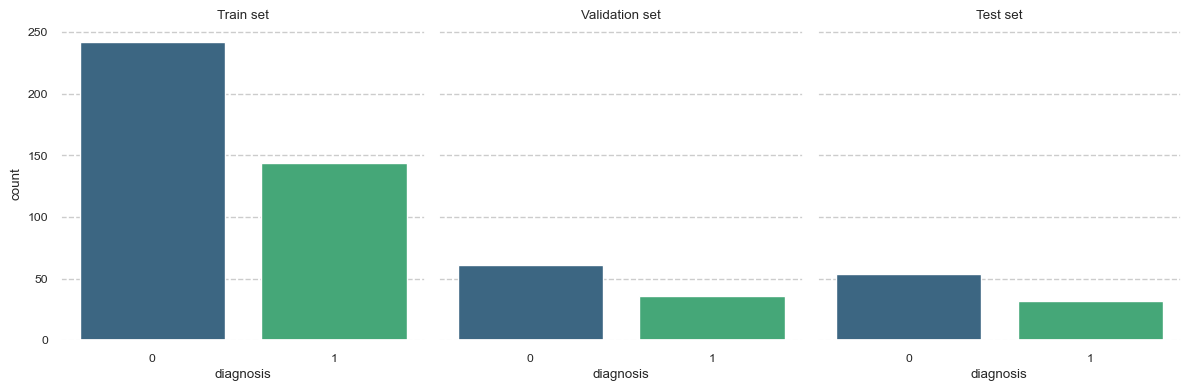

In [7]:
# visualize the label distributions in each split
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

sns.countplot(data=pd.DataFrame(y_train), x="diagnosis", hue="diagnosis", palette=palette, legend=False, ax=axes[0])
axes[0].set_title("Train set")

sns.countplot(data=pd.DataFrame(y_val), x="diagnosis", hue="diagnosis", palette=palette, legend=False, ax=axes[1])
axes[1].set_title("Validation set")

sns.countplot(data=pd.DataFrame(y_test), x="diagnosis", hue="diagnosis", palette=palette, legend=False, ax=axes[2])
axes[2].set_title("Test set")

plt.tight_layout()
plt.show()

Observations
* The use of `stratify` ensured that the distribution of benign and malignant tumors in the three datasets is the same.

### 2.2 Address outliers

In [8]:
# instantiate an outlier transformer object
outlier_transformer = dp.OutlierTransformer()

# fit the univariate transformer only on the train data to prevent data leakage (Galli, 2022, p. 200)
outlier_transformer.fit(X_train)

# generate the datasets with the missing values
X_train_na = outlier_transformer.transform(X_train)
X_val_na = outlier_transformer.transform(X_val)
X_test_na = outlier_transformer.transform(X_test)

# analyze the outliers in the three datasets
out_info = pd.concat([dp.get_outlier_descriptives(X_train_na, "train", out_as_na=True), dp.get_outlier_descriptives(X_val_na, "validation", out_as_na=True),
                      dp.get_outlier_descriptives(X_test_na, "test", out_as_na=True)], axis=1)
out_info.describe()

train_outlier_count  train_outlier_pct  validation_outlier_count  \
count               30.000             30.000                    30.000   
mean                12.367              3.204                     3.567   
std                  8.290              2.148                     2.909   
min                  0.000              0.000                     0.000   
25%                  8.250              2.137                     2.000   
50%                 10.500              2.720                     3.000   
75%                 16.000              4.145                     4.000   
max                 43.000             11.140                    13.000   

       validation_outlier_pct  test_outlier_count  test_outlier_pct  
count                  30.000              30.000            30.000  
mean                    3.677               2.967             3.450  
std                     2.999               1.884             2.191  
min                     0.000               0.000             0.000  
25%                     2.062               2.000             2.326  
50%                     3.093               3.000             3.488  
75%                     4.124               4.000             4.651  
max                    13.402               8.000             9.302

Observations
* The percentages of outliers in the three datasets are rather similar.
* In the validation set and the test set, there are on average marginally more outliers per column in percentage terms than in the training set. 

#### 2.2.1 Replace Outliers with the Values of Their Nearest Neighbors

In [9]:
# instantiate a KNNReplacer object
knn_replacer = dp.KNNReplacer(n_neighbors=5, weights="distance")

# fit the KNNReplacer object only to the training data to prevent data leakage (Galli, 2022, p. 200)
knn_replacer.fit(X_train_na)

# impute missing values using the values of their five nearest neighbors 
print("Train set:")
X_train_knn = knn_replacer.transform(X_train_na, verbose=True)
print("\nValidation set:")
X_val_knn = knn_replacer.transform(X_val_na, verbose=True)
print("\nTest set:")
X_test_knn = knn_replacer.transform(X_test_na, verbose=True)

Train set:
Number of values replaced: 371 (3.2 % of the data)
Mean number of values replaced per column: 12.37 (3.2 %)
Minimum number of values replaced per column: 0 (0.0 %)
Maximum number of values replaced per column: 43 (11.14 %)

Validation set:
Number of values replaced: 107 (3.68 % of the data)
Mean number of values replaced per column: 3.57 (3.68 %)
Minimum number of values replaced per column: 0 (0.0 %)
Maximum number of values replaced per column: 13 (13.4 %)

Test set:
Number of values replaced: 89 (3.45 % of the data)
Mean number of values replaced per column: 2.97 (3.45 %)
Minimum number of values replaced per column: 0 (0.0 %)
Maximum number of values replaced per column: 8 (9.3 %)


In [10]:
# analyze changes (in percentage) due to replacement
norm_diff_knn = dp.calculate_difference_statistics(X_train, X_train_knn)
norm_diff_knn

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
count        0.000         0.000           0.000      0.000            0.000   
mean        -1.236        -0.406          -1.351     -4.298           -0.157   
std        -10.884        -3.810         -11.388    -20.017           -5.523   
min          0.000         0.000           0.000      0.000           29.736   
25%          0.000         0.000           0.000      0.000            0.060   
50%          0.000         0.000           0.000      0.000            0.062   
75%          0.000        -0.103           0.000     -0.828           -0.037   
max        -22.768       -10.697         -23.395    -46.981           -7.740   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count             0.000           0.000                0.000          0.000   
mean             -2.848          -4.375               -3.347         -1.005   
std             -13.319         -11.612               -9.419        -13.007   
min               0.000             NaN                  NaN          0.000   
25%               0.000           0.000                0.000          0.000   
50%               0.000           0.000                0.000         -0.036   
75%              -0.247          -2.040               -0.608         -0.736   
max             -33.874         -31.724              -24.453        -20.954   

       fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
count                   0.000      0.000       0.000         0.000    0.000   
mean                   -0.873     -8.179      -4.751        -9.198  -19.687   
std                   -15.360    -36.442     -22.154       -41.256  -58.551   
min                     0.000      0.000       0.000         0.000    0.000   
25%                     0.000      0.000       0.000         0.000    0.000   
50%                    -0.257     -0.466      -1.139         0.000   -0.199   
75%                    -0.558     -4.773      -2.381        -2.603   -2.353   
max                   -19.550    -69.332     -50.338       -72.357  -84.098   

       smoothness_se  compactness_se  concavity_se  concave points_se  \
count          0.000           0.000         0.000              0.000   
mean          -6.563          -7.914        -9.150             -3.501   
std          -29.922         -27.661       -33.430            -16.188   
min            0.000           0.000           NaN                NaN   
25%           -0.647           0.000         0.000              0.000   
50%           -2.550          -0.140        -0.706              0.000   
75%           -4.606          -1.979        -2.093             -0.971   
max          -58.015         -54.114       -73.147            -36.479   

       symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
count        0.000                 0.000         0.000          0.000   
mean        -6.687               -11.267        -1.624         -0.394   
std        -32.025               -44.507       -12.082         -3.518   
min          0.000                 0.000         0.000          0.000   
25%         -2.246                 0.000         0.000          0.000   
50%         -1.507                -0.551         0.000          0.000   
75%         -5.870                -7.470        -1.273         -0.273   
max        -53.490               -65.542       -22.003        -13.625   

       perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
count            0.000       0.000             0.000              0.000   
mean            -1.646      -5.880            -0.229             -3.763   
std            -11.691     -24.165            -5.765            -15.280   
min              0.000       0.000            18.154              0.000   
25%              0.000       0.000             0.233              0.000   
50%              0.000       0.000             0.151              0.000   
75%             -0.65

Observations
* Due to the treatment of outliers, the maximum value has decreased for all features. This was to be expected, as very high values were identified as outliers for all features.
* In addition, the standard deviation was also reduced for all features (also to be expected).
* There are significantly smaller percentage changes for the median and mean value than for the standard deviation and the maximum value. 

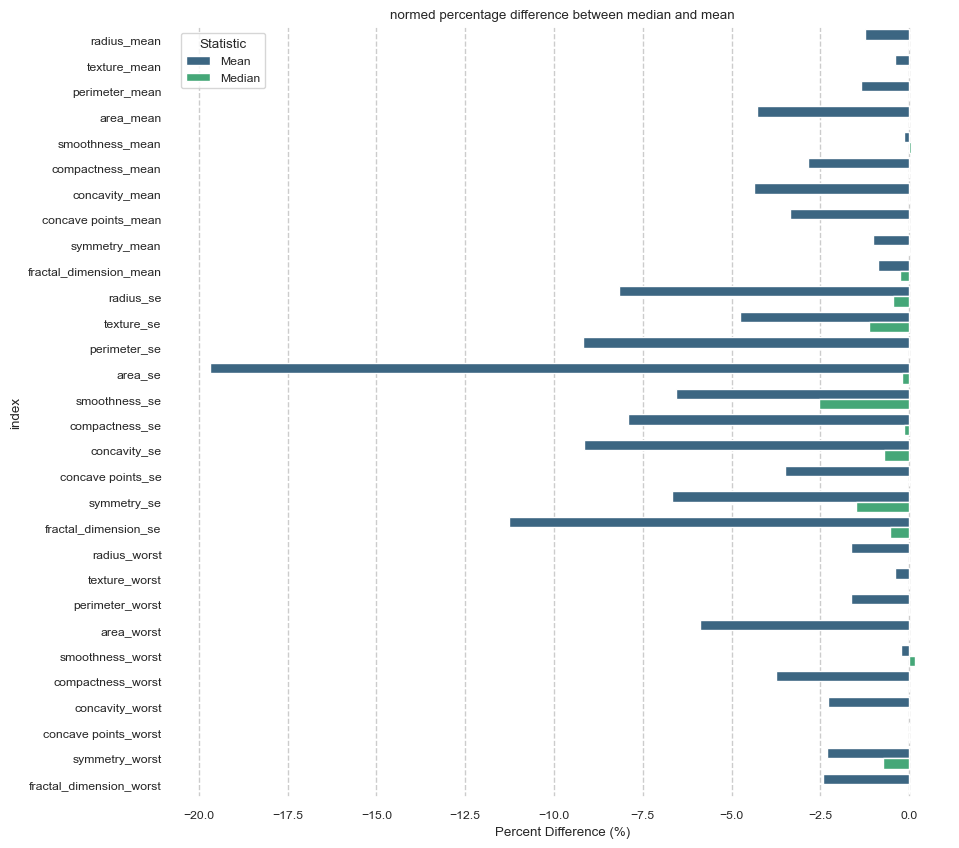

In [11]:
dp.visualize_difference_statistics(norm_diff_knn)

Observations
* There is no change in the median for most features.
* The change in the median is smaller in absolute terms for all features than the change in the mean.
* The changes in the `_se` features are greater than the changes in the `_mean` and `_worst` features.
* For two features (`area_se` and `fractal_dimension_se`), the percentage change in the mean is greater than 10 %. 

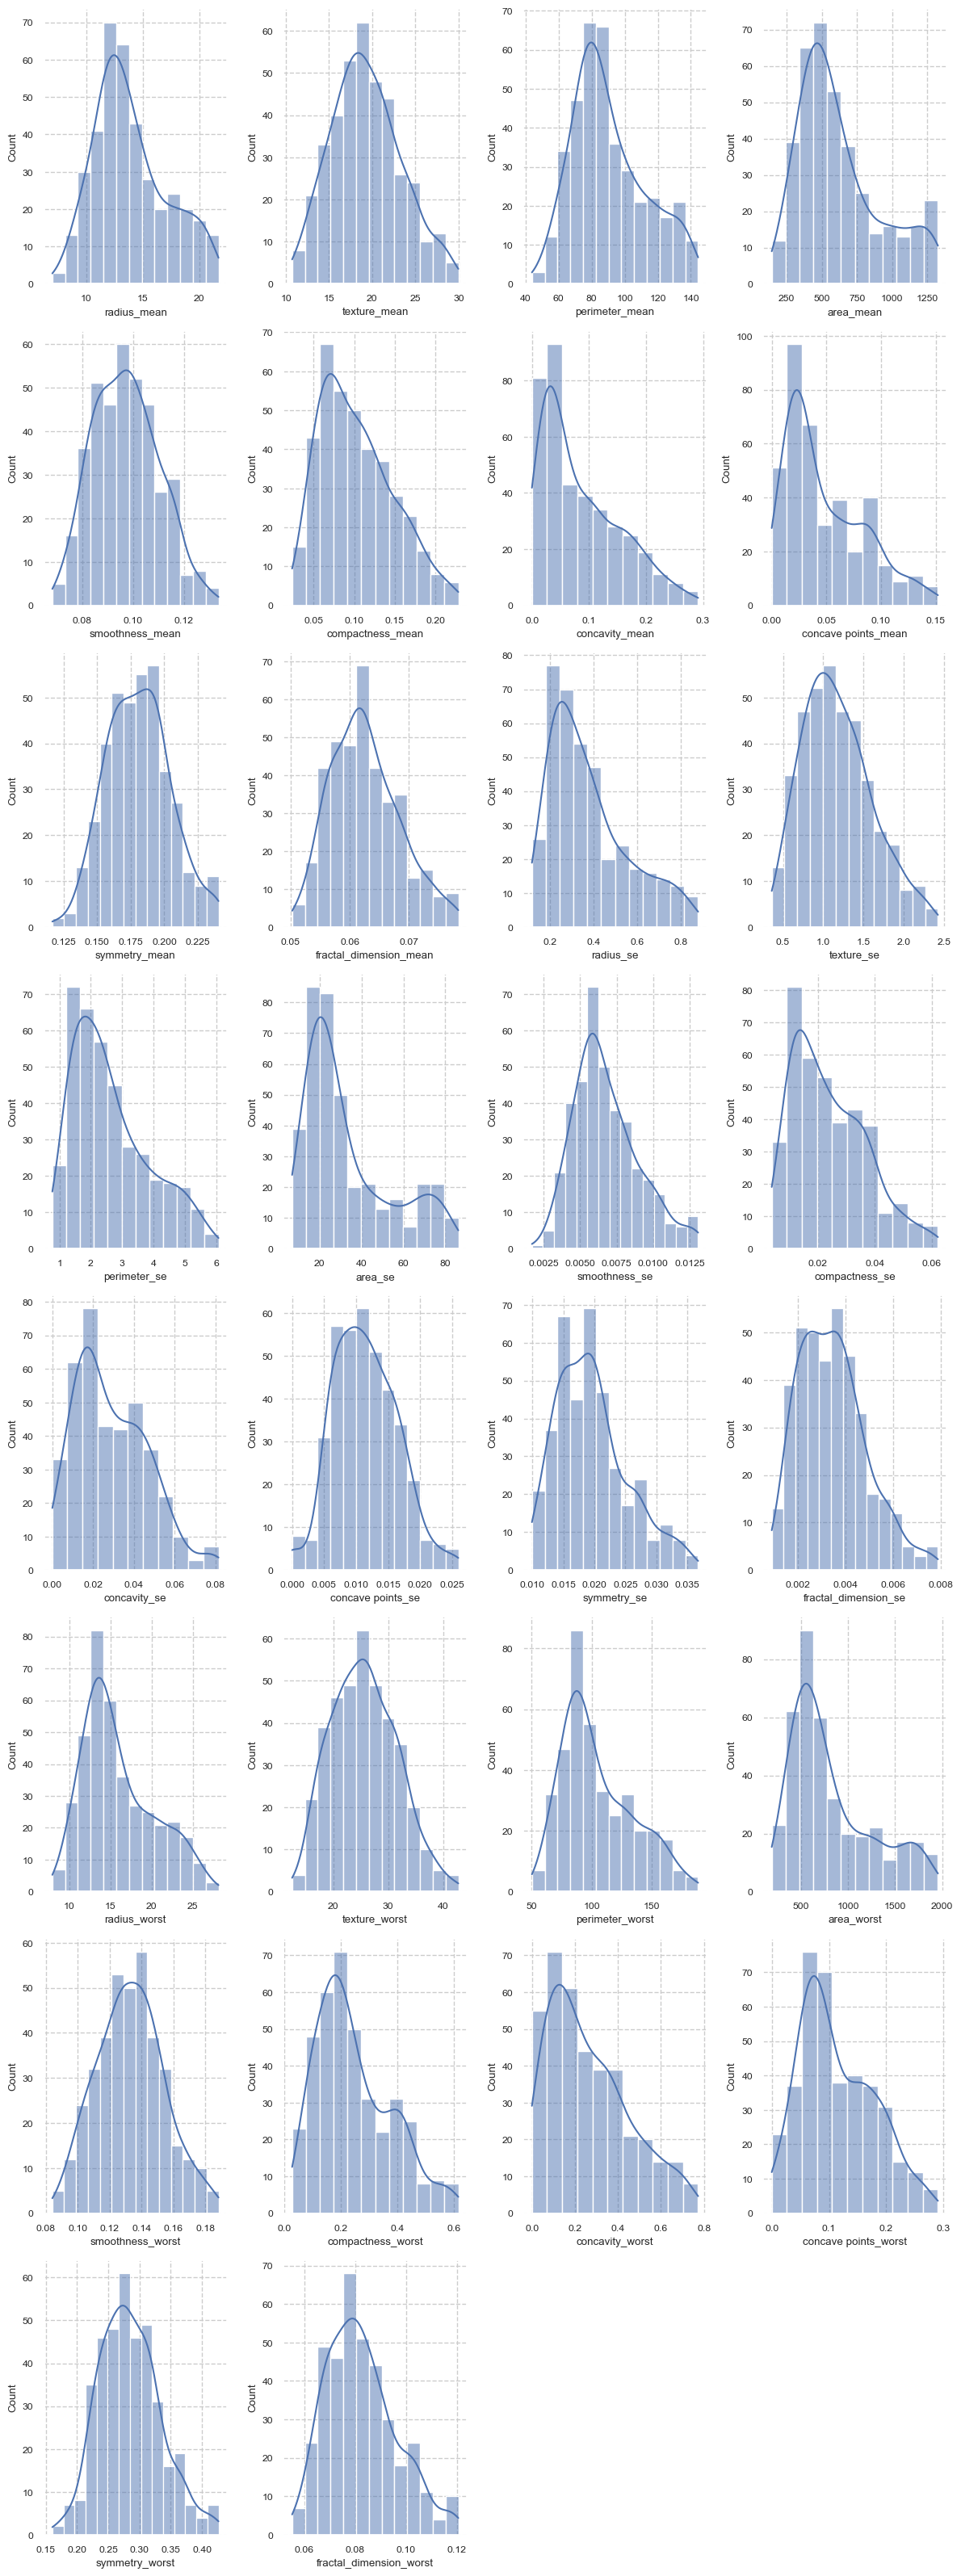

In [12]:
dp.generate_histograms(X_train_knn)

Observations
* Many features still display right-skewed distributions even after the outlier treatment by the `KNNReplacer`.
* The change due to the outlier treatment is particularly evident in the right-hand diagram area and in the `_se` features, as there are fewer extreme values here than before the outlier treatment. 

#### 2.2.2 Replace Outliers by Capping

In [13]:
# instantiate an IQRCapper object
capper = dp.IQRCapper()

# fit the IQRCapper object only to the training data to prevent data leakage (Galli, 2022, p. 200)
capper.fit(X_train)

# address univariate outliers in the three datasets by capping them
print("Test set")
X_train_cap = capper.transform(X_train, verbose=True)
print("\nValidation set:")
X_val_cap = capper.transform(X_val, verbose=True)
print("\nTest set:")
X_test_cap = capper.transform(X_test, verbose=True)

Test set
Number of values replaced: 371 (3.2 % of the data)
Mean number of values replaced per column: 12.37 (3.2 %)
Minimum number of values replaced per column: 0 (0.0 %)
Maximum number of values replaced per column: 43 (11.14 %)

Validation set:
Number of values replaced: 107 (3.68 % of the data)
Mean number of values replaced per column: 3.57 (3.68 %)
Minimum number of values replaced per column: 0 (0.0 %)
Maximum number of values replaced per column: 13 (13.4 %)

Test set:
Number of values replaced: 89 (3.45 % of the data)
Mean number of values replaced per column: 2.97 (3.45 %)
Minimum number of values replaced per column: 0 (0.0 %)
Maximum number of values replaced per column: 8 (9.3 %)


In [14]:
# analyze changes due to replacement
norm_diff_cap = dp.calculate_difference_statistics(X_train, X_train_cap)
norm_diff_cap

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
count        0.000         0.000           0.000      0.000            0.000   
mean        -0.557        -0.077          -0.606     -2.603           -0.035   
std         -6.298        -1.016          -6.572    -14.995           -1.513   
min          0.000         0.000           0.000      0.000           11.913   
25%          0.000         0.000           0.000      0.000            0.000   
50%          0.000         0.000           0.000      0.000            0.000   
75%          0.000         0.000           0.000      0.000            0.000   
max        -21.331       -10.407         -21.673    -46.239           -6.690   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count             0.000           0.000                0.000          0.000   
mean             -1.020          -1.397               -0.920         -0.266   
std              -6.472          -5.136               -3.604         -5.583   
min               0.000             NaN                  NaN          0.000   
25%               0.000           0.000                0.000          0.000   
50%               0.000           0.000                0.000          0.000   
75%               0.000           0.000                0.000          0.000   
max             -33.833         -31.504              -23.434        -18.544   

       fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  \
count                   0.000      0.000       0.000         0.000    0.000   
mean                   -0.254     -4.537      -1.553        -5.351  -14.171   
std                    -7.935    -27.550     -12.643       -31.851  -51.122   
min                     0.000      0.000       0.000         0.000    0.000   
25%                     0.000      0.000       0.000         0.000    0.000   
50%                     0.000      0.000       0.000         0.000    0.000   
75%                     0.000      0.000       0.000         0.000    0.000   
max                   -18.590    -68.910     -49.875       -71.882  -84.055   

       smoothness_se  compactness_se  concavity_se  concave points_se  \
count          0.000           0.000         0.000              0.000   
mean          -2.174          -3.105        -4.151             -1.085   
std          -18.429         -15.537       -23.143             -7.531   
min            0.000           0.000           NaN                NaN   
25%            0.000           0.000         0.000              0.000   
50%            0.000           0.000         0.000              0.000   
75%            0.000           0.000         0.000              0.000   
max          -57.766         -52.496       -71.987            -35.101   

       symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
count        0.000                 0.000         0.000          0.000   
mean        -2.244                -5.281        -0.559         -0.096   
std        -19.184               -31.304        -5.588         -1.350   
min          0.000                 0.000         0.000          0.000   
25%          0.000                 0.000         0.000          0.000   
50%          0.000                 0.000         0.000          0.000   
75%          0.000                 0.000         0.000          0.000   
max        -53.257               -65.506       -21.927        -12.033   

       perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
count            0.000       0.000             0.000              0.000   
mean            -0.547      -3.631            -0.116             -1.596   
std             -5.340     -18.016            -2.415             -8.199   
min              0.000       0.000             4.872              0.000   
25%              0.000       0.000             0.000              0.000   
50%              0.000       0.000             0.000              0.000   
75%              0.00

Observations
* The same effects can be seen here as in the treatment of the outliers using the `KNNReplacer`: there are percentage reductions in both the standard deviation and the maximum value of the features as a result of the outlier treatment using the `IQRCapper`.
* As was to be expected with this outlier treatment method, there are no differences in the 25th, 50th and 75th quartiles of the features.
* The percentage differences in the mean are nonetheless present, but at first glance less pronounced than in the treatment of outliers using the `KNNReplacer`. 

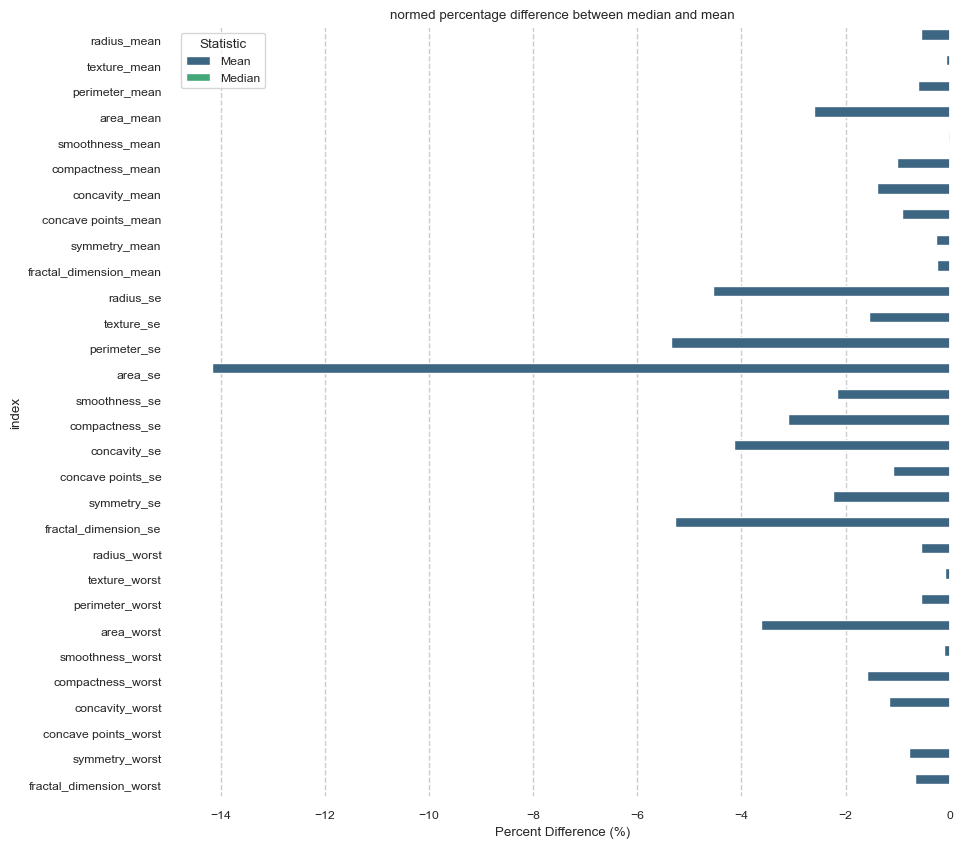

In [15]:
dp.visualize_difference_statistics(norm_diff_cap)

Observations
* As already described, outlier capping only results in percentage changes in the mean value, not in the median. 
* Again, the changes in the `_se` features are greater than in the other features.
* Again, the largest change can be seen in the mean value of `area_se`. However, this is the only change of more than 10%.
* The changes are less pronounced than in the outlier treatment using the `KNNReplacer`.   

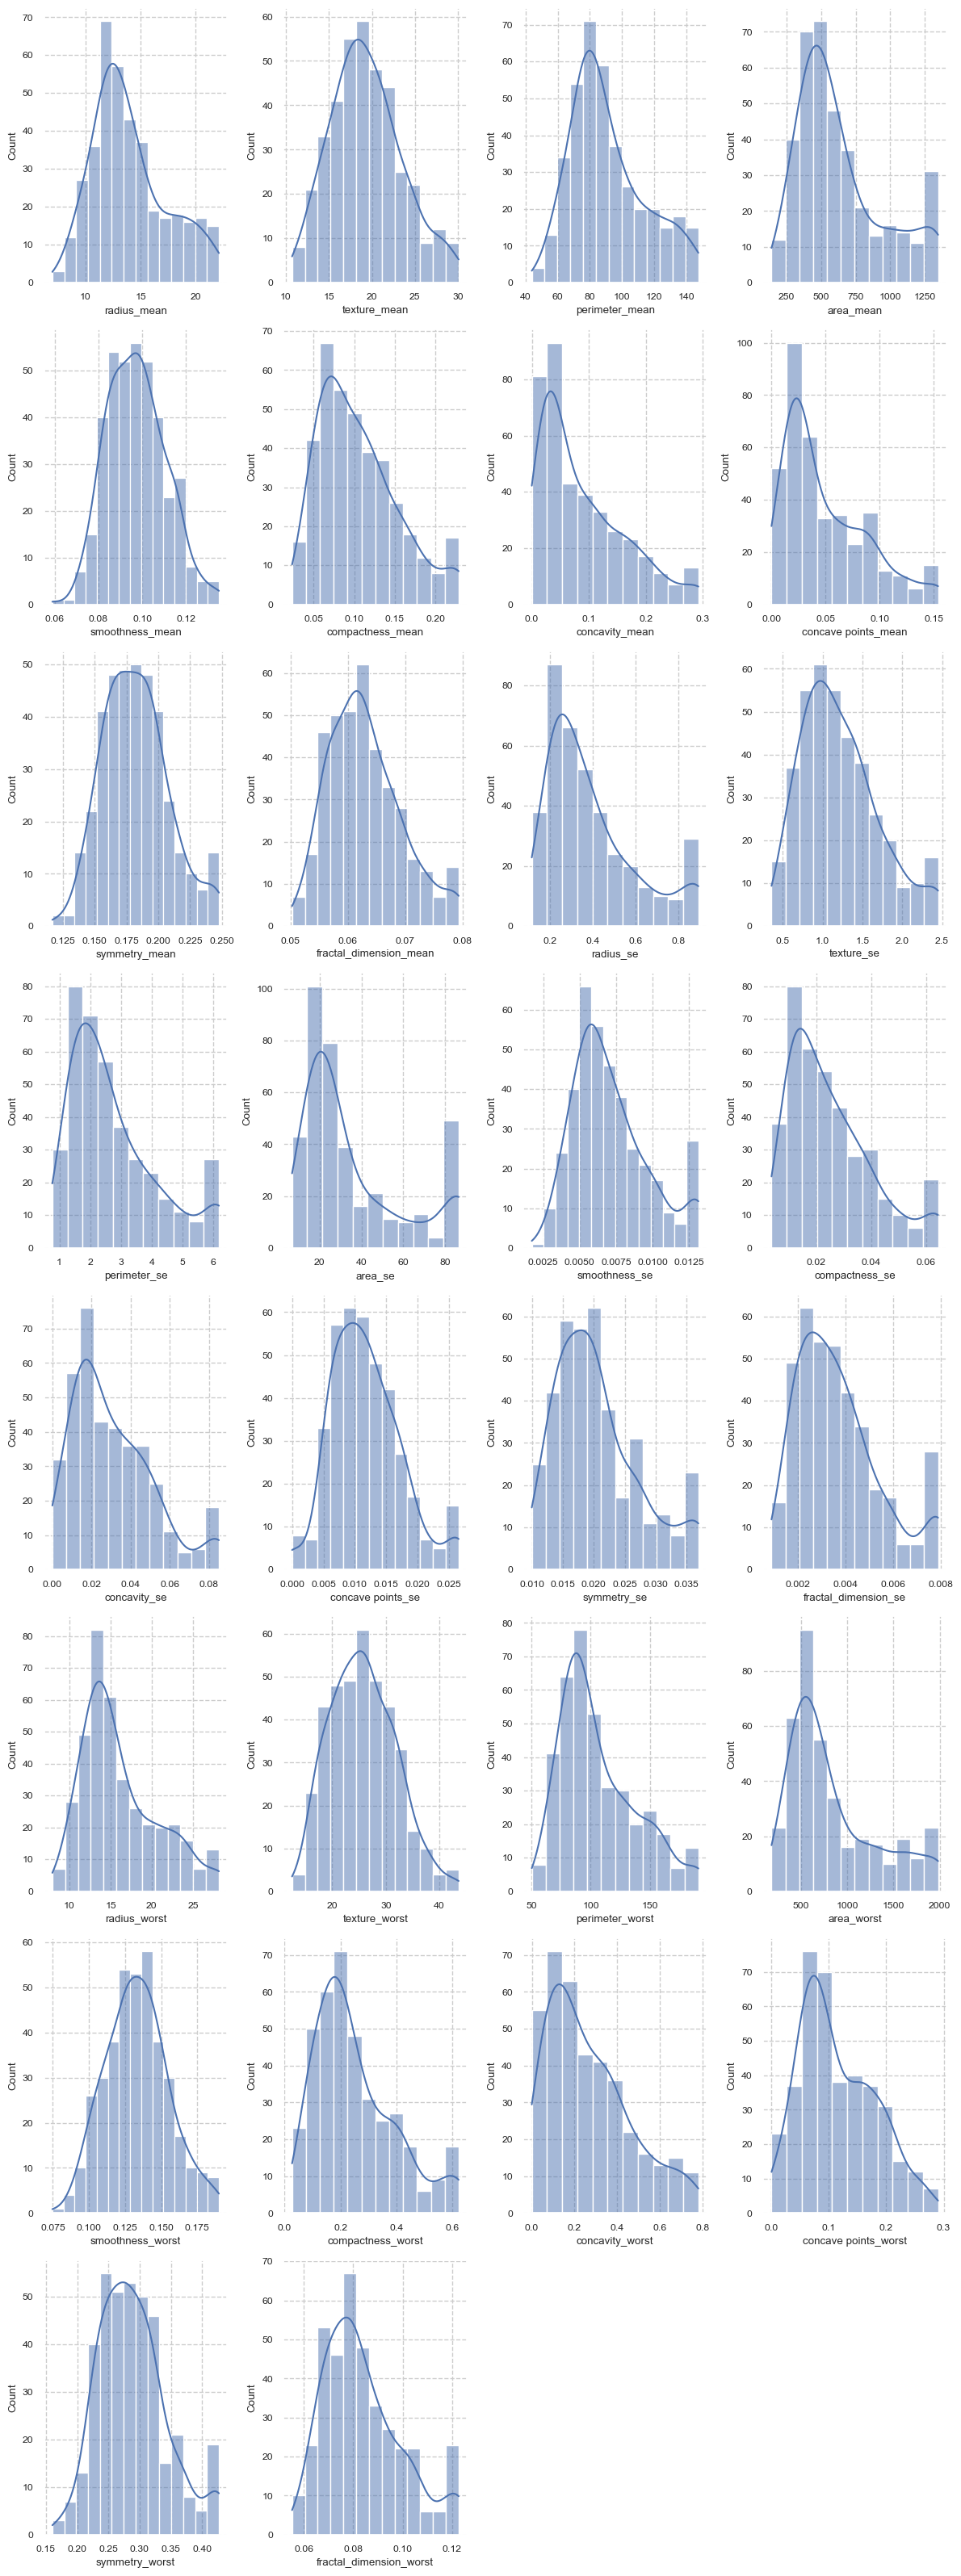

In [16]:
dp.generate_histograms(X_train_cap)

Observations
* For many features, the effects of outlier capping are clearly visible on the right edge of the plots: Especially for the `_se` features, but also for `area_mean`, for example, it is clearly visible that there are now more values on the right edge of the distribution than before the outlier treatment.

## 3 Construct Data
### 3.1 Derive new features
#### 3.1.1 Absolute Deviation from a Circular Shape

In [17]:
# calculate the absolute difference between the area and other area calculation methods to look at differences from circular shapes
X_area_diff = dp.calculate_circular_deviation(X_train_knn)

# add the label to the dataset to judge group differences
df_area_diff = dp.add_label(X_area_diff, y_train)

# display mean and median for the newly created features in the two tumor groups
df_area_diff.groupby("diagnosis").agg(['mean', 'median'])

diff_area_radius_worst        diff_area_perimeter_worst          \
                            mean median                      mean  median   
diagnosis                                                                   
0                         15.258 13.870                    56.215  47.786   
1                         59.499 25.364                   239.578 191.409   

          diff_area_radius_mean        diff_area_perimeter_mean          
                           mean median                     mean  median  
diagnosis                                                                
0                        10.575  9.809                   33.011  29.278  
1                        24.476 12.598                  121.273 105.769

Observations
* The two tumor groups differ in terms of their median and mean value in the new features.
* The absolute deviation of tumor cells from a circle is greater for malignant tumors than for benign tumors. 

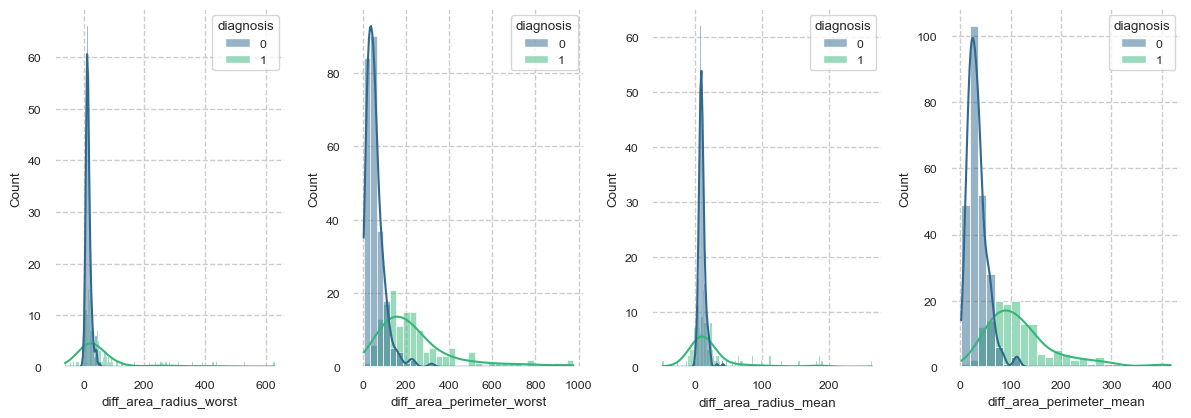

In [18]:
# generate histograms
dp.generate_histograms(df_area_diff, hue="diagnosis")

Observations
* The histograms clearly show that there are outliers in the newly generated features that need to be treated.
* It is evident that the new features in the group of malignant tumors have a higher variance than in the group of benign tumors.
* In the absolute differences based on the `perimeter`, the differences between the two tumor groups are more pronounced than in the absolute differences based on the `radius`. 

#### 3.1.2 Relative Deviation from a Circular Shape

In [19]:
# calculate the relative difference between the area and other area calculation methods to look at differences from circular shapes
X_area_ratio = dp.calculate_circular_deviation(X_train_knn, absolute=False)

# add the label to the dataset to judge group differences
df_area_ratio = dp.add_label(X_area_ratio, y_train)

# display mean and median for the newly created features in the two tumor groups
df_area_ratio.groupby("diagnosis").agg(['mean', 'median'])

ratio_area_radius_worst        ratio_area_perimeter_worst         \
                             mean median                       mean median   
diagnosis                                                                    
0                           1.029  1.027                      1.101  1.089   
1                           1.042  1.019                      1.183  1.147   

          ratio_area_radius_mean        ratio_area_perimeter_mean         
                            mean median                      mean median  
diagnosis                                                                 
0                          1.025  1.023                     1.072  1.067  
1                          1.025  1.015                     1.130  1.117

Observations
* Compared to the absolute differences, the differences in the two tumor groups are less pronounced with regard to the relative differences. 

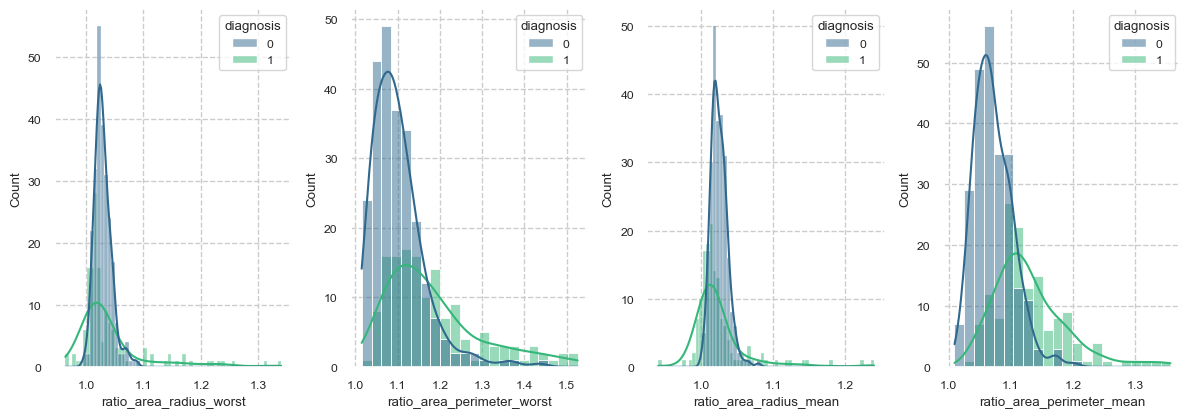

In [20]:
# generate histograms
dp.generate_histograms(df_area_ratio, hue="diagnosis")

Observations
* The histograms clearly show that there are outliers in the newly generated features that need to be treated.
* The histograms also clearly show that the differences between the two tumor groups are less pronounced in the relative differences than in the absolute differences. 

#### 3.1.3 Absolute Difference Between the Worst and the Mean Characteristic

In [21]:
# calculate the absolute differences between the worst characteristic of a feature and its mean characteristic
X_dev_diff = dp.calculate_worst_mean_deviation(X_train_knn)

# add the label to the dataset to judge group differences
df_dev_diff = dp.add_label(X_dev_diff, y_train)

# display mean and median for the newly created features in the two tumor groups
df_dev_diff.groupby("diagnosis").agg(['mean', 'median'])

radius_worst_diff_mean        texture_worst_diff_mean         \
                            mean median                    mean median   
diagnosis                                                                
0                          1.228  1.190                   5.669  5.320   
1                          3.380  3.165                   7.500  7.500   

          perimeter_worst_diff_mean        area_worst_diff_mean          \
                               mean median                 mean  median   
diagnosis                                                                 
0                             8.849  8.525               94.600  87.700   
1                            24.147 22.600              375.740 356.250   

          smoothness_worst_diff_mean        compactness_worst_diff_mean  \
                                mean median                        mean   
diagnosis                                                                 
0                              0.033  0.031                       0.102   
1                              0.041  0.041                       0.213   

                 concave points_worst_diff_mean         \
          median                           mean median   
diagnosis                                                
0          0.090                          0.048  0.047   
1          0.215                          0.097  0.096   

          symmetry_worst_diff_mean        fractal_dimension_worst_diff_mean  \
                              mean median                              mean   
diagnosis                                                                     
0                            0.097  0.094                             0.016   
1                            0.116  0.113                             0.025   

                  
          median  
diagnosis         
0          0.015  
1          0.024

Observations
* The two tumor groups differ in terms of their median and mean value in the new features.
* The difference between the `_worst` and `_mean` characteristic of the features is greater in malignant tumor cells than in benign tumor cells. This may indicate that cells in benign tumors are more similar to each other than cells in malignant tumors.  

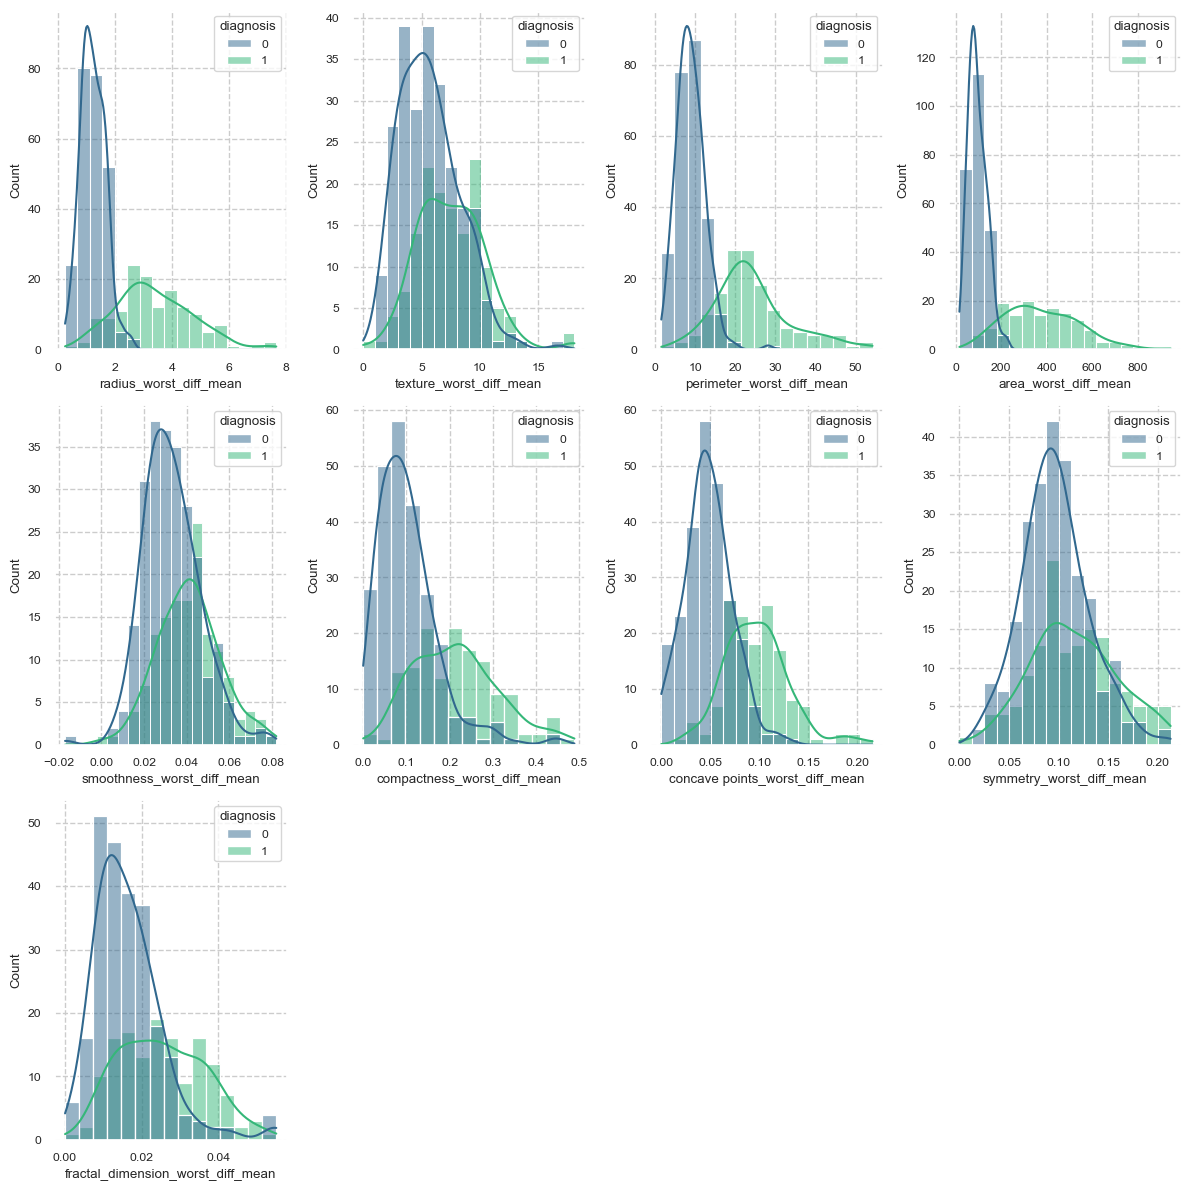

In [22]:
# generate histograms
dp.generate_histograms(df_dev_diff, hue="diagnosis")

Observations
* These features appear to have fewer outliers than the other newly generated features.
* For some features (e.g. `radius_worst_diff_mean`, `perimeter_worst_diff_mean`, `area_worst_diff_mean`, `concave_points_worst_diff_mean`), differences between the two tumor groups are more clearly visible than for other features (e.g. `texture_worst_diff_mean`, `smoothness_worst_diff_mean`).  

#### 3.1.4 Relative Difference Between the Worst to the Mean Characteristic

In [23]:
# calculate the relative differences between the worst characteristic of a feature and its mean characteristic
X_dev_ratio = dp.calculate_worst_mean_deviation(X_train_knn, absolute=False)

# add the label to the dataset to judge group differences
df_dev_ratio = dp.add_label(X_dev_ratio, y_train)

# display mean and median for the newly created features in the two tumor groups
df_dev_ratio.groupby("diagnosis").agg(['mean', 'median'])

radius_worst_ratio_mean        texture_worst_ratio_mean         \
                             mean median                     mean median   
diagnosis                                                                  
0                           1.103  1.101                    1.316  1.305   
1                           1.199  1.192                    1.350  1.341   

          perimeter_worst_ratio_mean        area_worst_ratio_mean         \
                                mean median                  mean median   
diagnosis                                                                  
0                              1.115  1.112                 1.213  1.205   
1                              1.216  1.207                 1.419  1.391   

          smoothness_worst_ratio_mean        compactness_worst_ratio_mean  \
                                 mean median                         mean   
diagnosis                                                                   
0                               1.354  1.333                        2.223   
1                               1.402  1.401                        2.551   

                 concave points_worst_ratio_mean         \
          median                            mean median   
diagnosis                                                 
0          2.108                           3.179  3.000   
1          2.459                           2.275  2.230   

          symmetry_worst_ratio_mean        fractal_dimension_worst_ratio_mean  \
                               mean median                               mean   
diagnosis                                                                       
0                             1.559  1.551                              1.259   
1                             1.607  1.605                              1.403   

                  
          median  
diagnosis         
0          1.238  
1          1.412

Observations
* Once again, the relative differences between the feature characteristics are less different in the two groups than the absolute differences.
* In the group of malignant tumors, the relative difference between the `_worst` and `_mean` characteristics is almost always greater than in the group of benign tumors. 

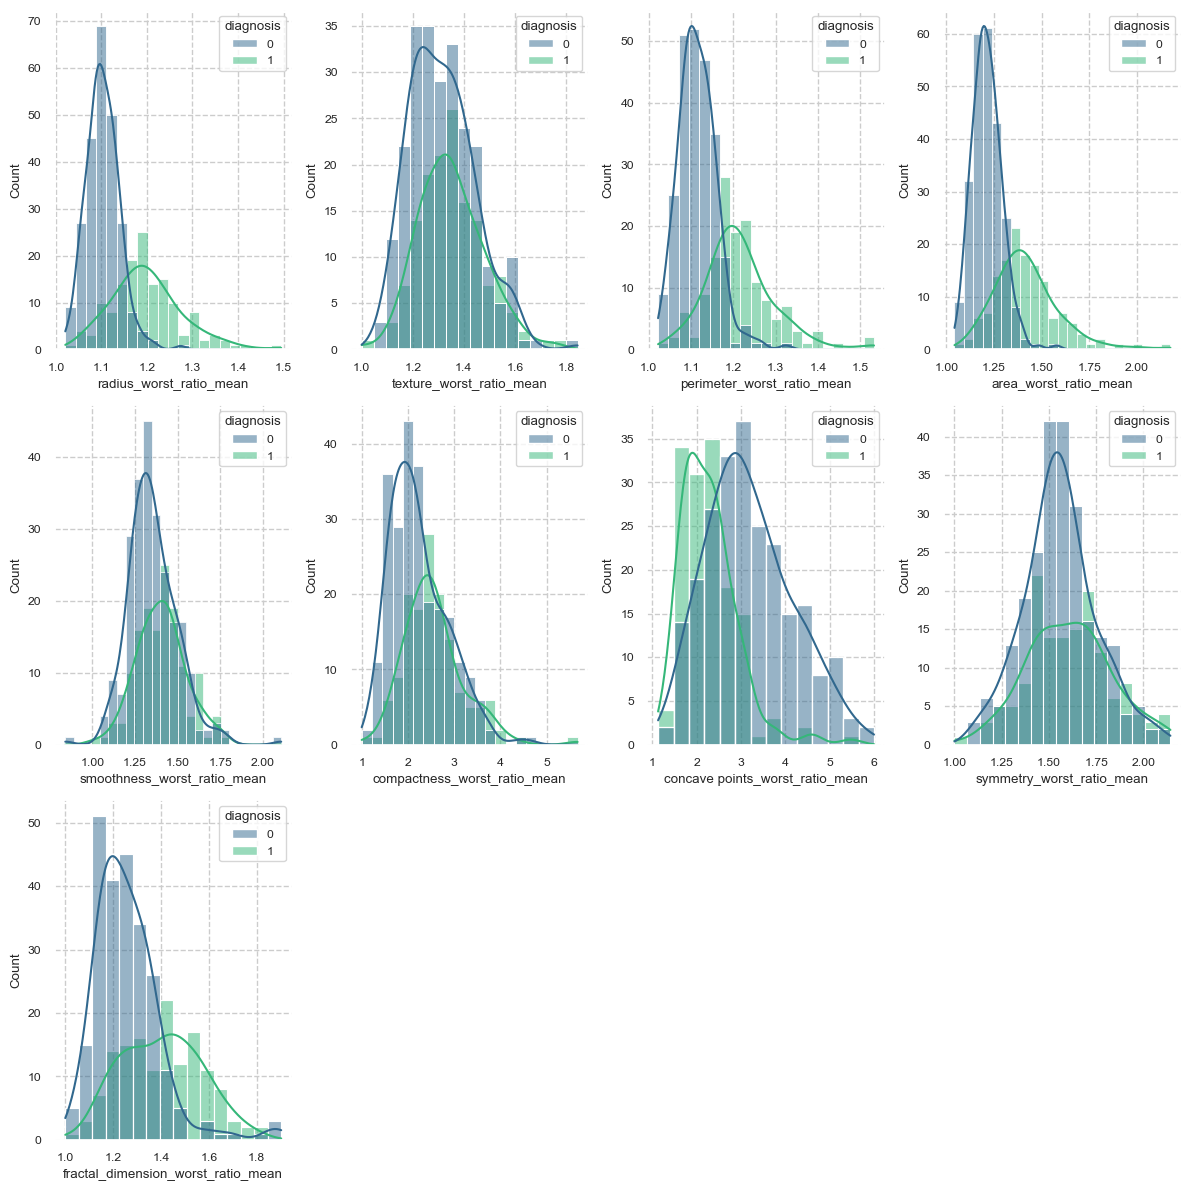

In [24]:
# generate histograms
dp.generate_histograms(df_dev_ratio, hue="diagnosis")

Observations
* Here, too, there are fewer outliers than in the calculation of the deviation of the tumor area from a circular shape.
* As with the absolute differences between the `_worst` and `_mean` characteristics, the differences between the two tumor groups are also more visible for some features (e.g. `radius_worst_ratio_mean`, `perimeter_worst_ratio_mean`, `area_worst_ratio_mean`) than for others (e.g. `texture_worst_ratio_mean`, `smoothness_worst_ratio_mean`).

#### 3.1.5 Address Outliers in the New Features

In [25]:
# generate the new features for each dataset
X_new_train_knn = dp.generate_deviation_features(X_train_knn)
X_new_val_knn = dp.generate_deviation_features(X_val_knn)
X_new_test_knn = dp.generate_deviation_features(X_test_knn)

# identify univariate outliers and mark them as missing
outlier_transformer = dp.OutlierTransformer()
outlier_transformer.fit(X_new_train_knn)
X_new_train_na = outlier_transformer.transform(X_new_train_knn)
X_new_val_na = outlier_transformer.transform(X_new_val_knn)
X_new_test_na = outlier_transformer.transform(X_new_test_knn)

# replace univariate outliers with the values of their nearest neighbors
knn_replacer = dp.KNNReplacer(n_neighbors=5, weights="distance")
knn_replacer.fit(X_new_train_na)
print("Train set:")
X_new_train_knn = knn_replacer.transform(X_new_train_na, verbose=True)
print("\nValidation set:")
X_new_val_knn = knn_replacer.transform(X_new_val_na, verbose=True)
print("\nTest set:")
X_new_test_knn = knn_replacer.transform(X_new_test_na, verbose=True)

Train set:
Number of values replaced: 399 (3.98 % of the data)
Mean number of values replaced per column: 15.35 (3.98 %)
Minimum number of values replaced per column: 3 (0.78 %)
Maximum number of values replaced per column: 47 (12.18 %)

Validation set:
Number of values replaced: 135 (5.35 % of the data)
Mean number of values replaced per column: 5.19 (5.35 %)
Minimum number of values replaced per column: 0 (0.0 %)
Maximum number of values replaced per column: 17 (17.53 %)

Test set:
Number of values replaced: 112 (5.01 % of the data)
Mean number of values replaced per column: 4.31 (5.01 %)
Minimum number of values replaced per column: 1 (1.16 %)
Maximum number of values replaced per column: 13 (15.12 %)


Observations
* On average, the percentage of outliers identified in the validation and test sets was higher than in the training set.

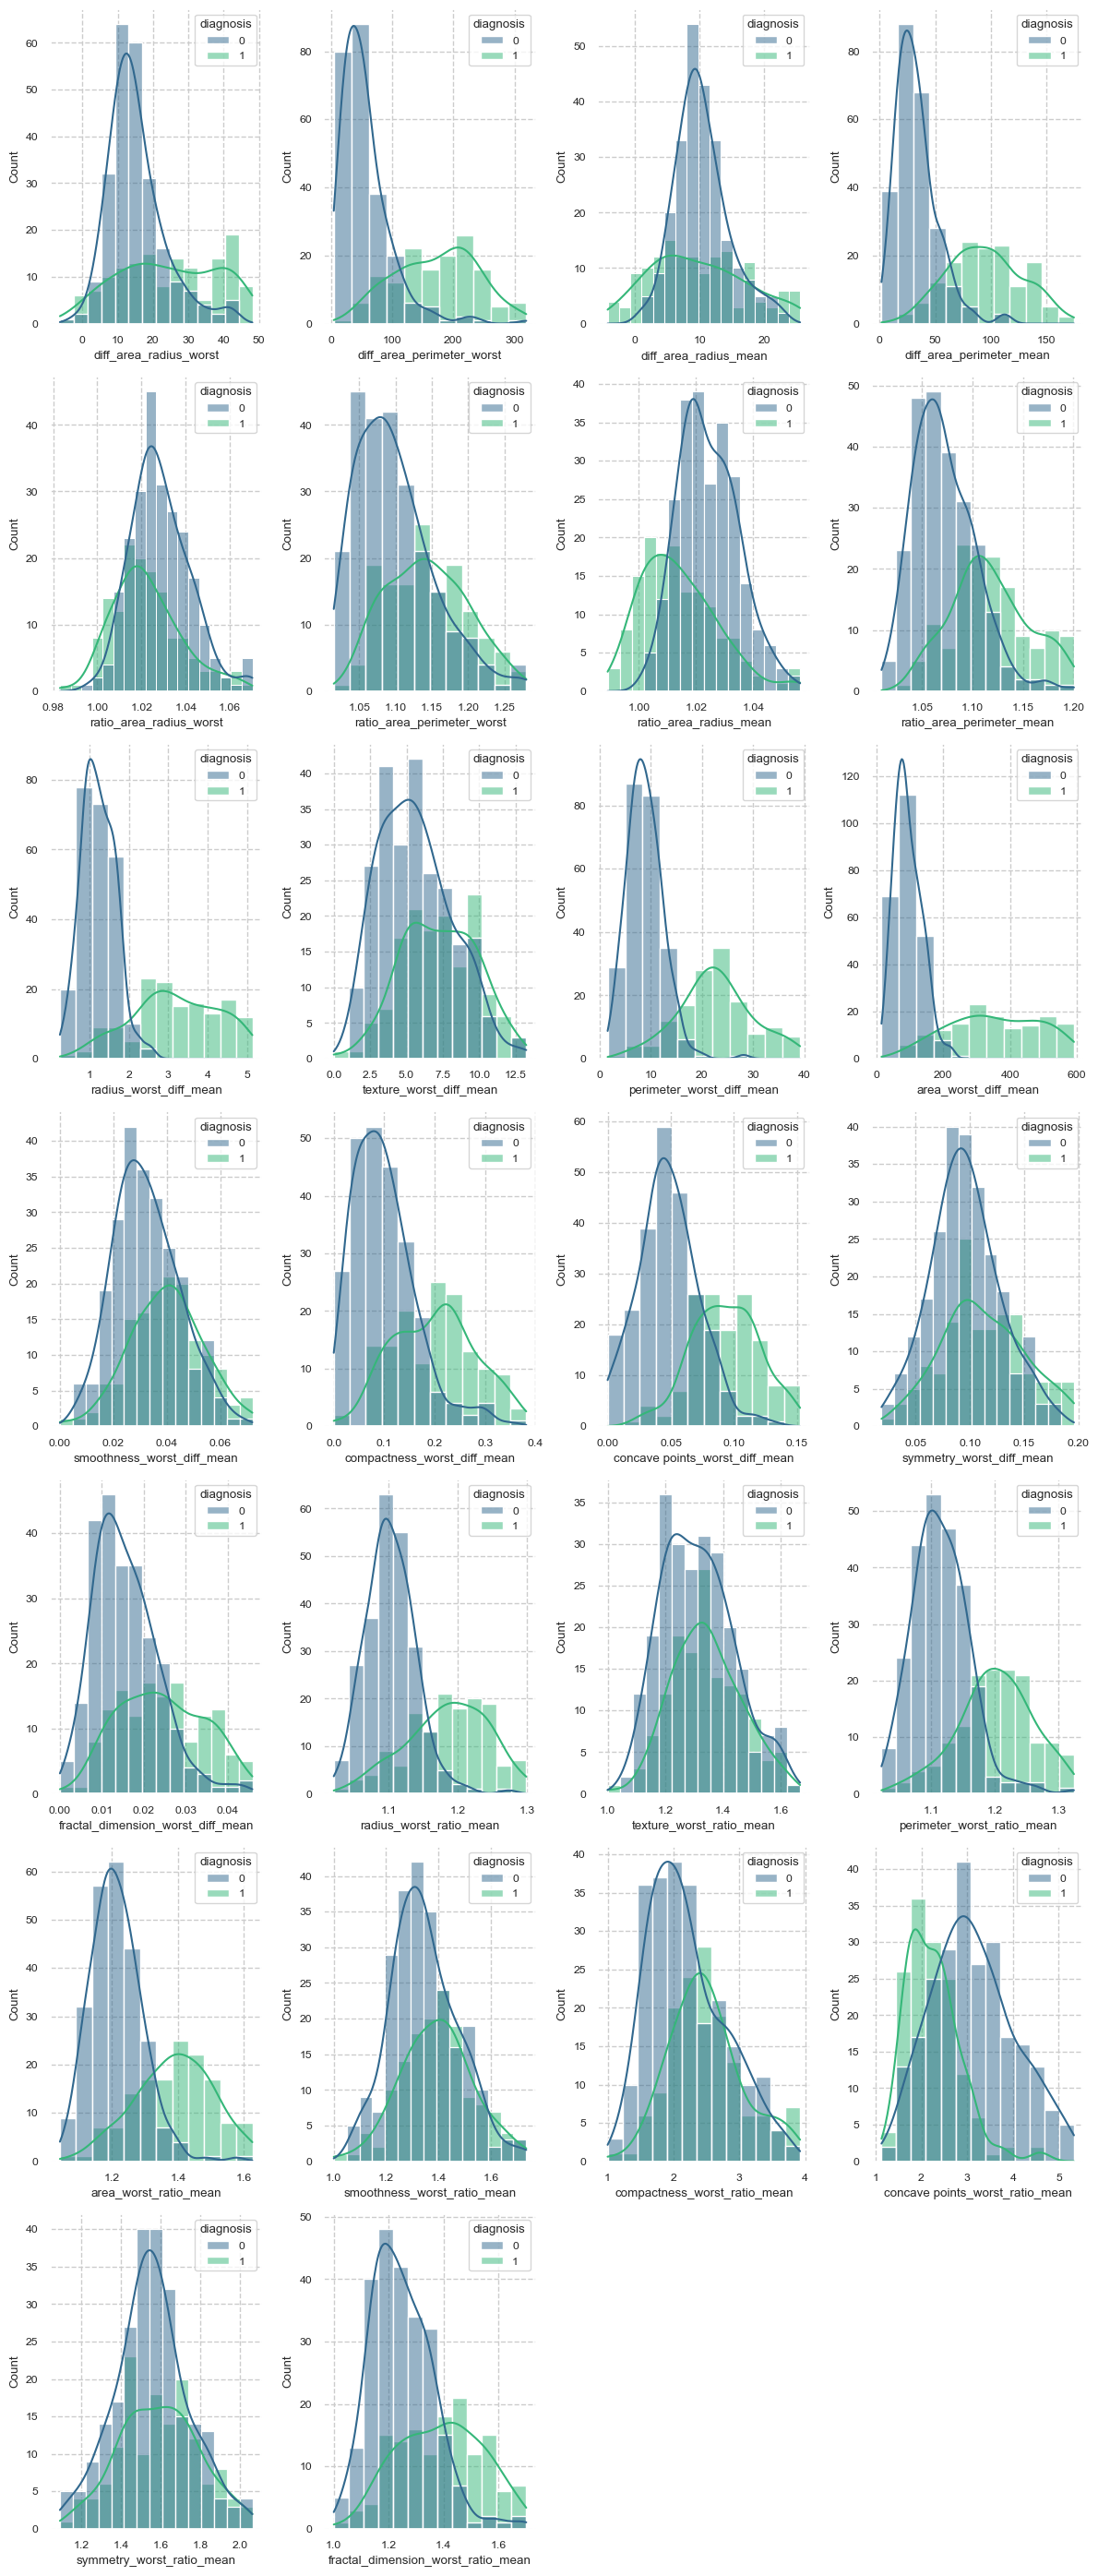

In [26]:
# visualize the new features in the training set
df_new_train_knn = dp.add_label(X_new_train_knn, y_train)
dp.generate_histograms(df_new_train_knn, hue="diagnosis")

Observations
* The histograms indicate that outliers have been successfully eliminated. 

#### 3.1.6 Add the Best Derived Features to the Dataset

In [27]:
# create a list of the features for which a difference between the two tumor groups can be visually recognized in the histograms
best_features = ["diff_area_perimeter_worst", "diff_area_perimeter_mean", "radius_worst_diff_mean",
                 "perimeter_worst_diff_mean", "area_worst_diff_mean",
                 "radius_worst_ratio_mean", "perimeter_worst_ratio_mean", "area_worst_ratio_mean"]

# add the best features to the three datasets
X_train_d = pd.concat([X_train_knn, X_new_train_knn[best_features]], axis=1)
print(f"Shape of the train set: {X_train_d.shape}")
X_val_d = pd.concat([X_val_knn, X_new_val_knn[best_features]], axis=1)
print(f"Shape of the validation set: {X_val_d.shape}")
X_test_d = pd.concat([X_test_knn, X_new_test_knn[best_features]], axis=1)
print(f"Shape of the test set: {X_test_d.shape}")

Shape of the train set: (386, 38)
Shape of the validation set: (97, 38)
Shape of the test set: (86, 38)


Observations
* 8 features were added to the dataset, so that it now contains a total of 38 features. 

### 3.2 Interaction Terms

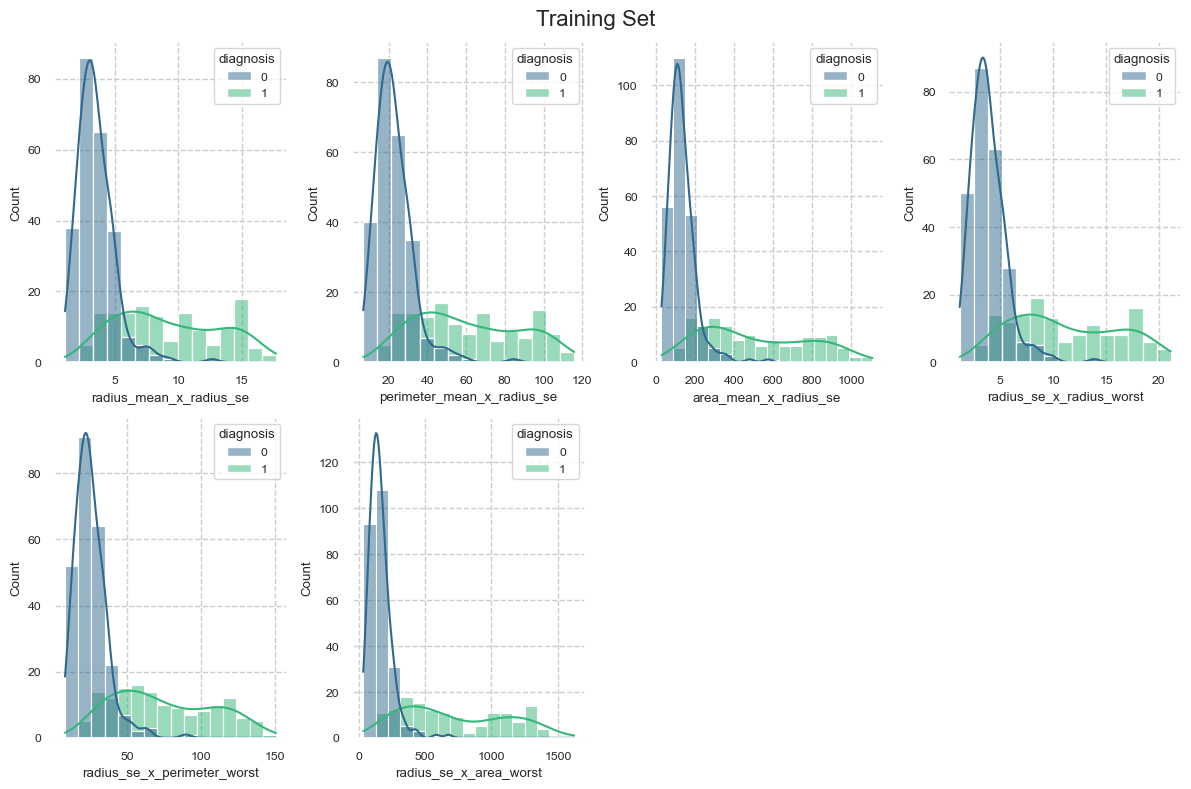

In [28]:
# Calculate interaction terms for the features whose correlation differs greatly between the two tumor groups
X_train_inter, interaction_pairs = dp.generate_interaction_features(X_train_knn, y_train, diff_size=0.4)

# generate the same interaction terms for the validation and the test dataset
X_val_inter = dp.apply_interaction_features(X_val_knn, interaction_pairs)
X_test_inter = dp.apply_interaction_features(X_test_knn, interaction_pairs)

# visualize the interaction features for the training set
df_train_inter = dp.add_label(X_train_inter, y_train)
dp.generate_histograms(df_train_inter, hue="diagnosis", title="Training Set")

Observations
* The distribution of the two tumor groups differs significantly in the interaction features. The overlap between the distributions of the two tumor groups is comparatively small. 
* The variance in the features in the group of malignant tumors is significantly greater than the variance in the features in the group of benign tumors.
* In contrast to the data understanding phase, in which the entire data was used, only 6 correlations in the train set show differences of at least 0.4 in the correlations of the characteristics in the two tumor groups. 

#### 3.2.1 Address Outliers in the Interaction Terms

In [29]:
# identify outliers and mark them as missing using the OutlierTransformer 
outlier_inter = dp.OutlierTransformer()
outlier_inter.fit(X_train_inter)
X_train_inter_na = outlier_inter.transform(X_train_inter)
X_val_inter_na = outlier_inter.transform(X_val_inter)
X_test_inter_na = outlier_inter.transform(X_test_inter)

# replace univariate outliers with the values of their nearest neighbors
knn_inter = dp.KNNReplacer(n_neighbors=5, weights="distance")
knn_inter.fit(X_train_inter_na)

print("Train set:")
X_train_inter_knn = knn_inter.transform(X_train_inter_na, verbose=True)
print("\nValidation set:")
X_val_inter_knn = knn_inter.transform(X_val_inter_na, verbose=True)
print("\nTest set:")
X_test_inter_knn = knn_inter.transform(X_test_inter_na, verbose=True)

Train set:
Number of values replaced: 221 (9.54 % of the data)
Mean number of values replaced per column: 36.83 (9.54 %)
Minimum number of values replaced per column: 32 (8.29 %)
Maximum number of values replaced per column: 46 (11.92 %)

Validation set:
Number of values replaced: 77 (13.23 % of the data)
Mean number of values replaced per column: 12.83 (13.23 %)
Minimum number of values replaced per column: 11 (11.34 %)
Maximum number of values replaced per column: 16 (16.49 %)

Test set:
Number of values replaced: 37 (7.17 % of the data)
Mean number of values replaced per column: 6.17 (7.17 %)
Minimum number of values replaced per column: 3 (3.49 %)
Maximum number of values replaced per column: 9 (10.47 %)


Observations
* The proportion of outliers in the interaction features is relatively high compared to the other features: just under 10% in the train set and 13% in the validation set. 

#### 3.2.2 Add interaction Terms to the Dataset

In [30]:
# add the interaction terms to the three datasets
X_train_di = pd.concat([X_train_d, X_train_inter_knn], axis=1)
print(f"Shape of train set: {X_train_di.shape}")
X_val_di = pd.concat([X_val_d, X_val_inter_knn], axis=1)
print(f"Shape of validation set: {X_val_di.shape}")
X_test_di = pd.concat([X_test_d, X_test_inter_knn], axis=1)
print(f"Shape of test set: {X_test_di.shape}")

Shape of train set: (386, 44)
Shape of validation set: (97, 44)
Shape of test set: (86, 44)


Observations
* After adding the six interaction features, the dataset now contains 44 features. 

## 4 Transform the Data

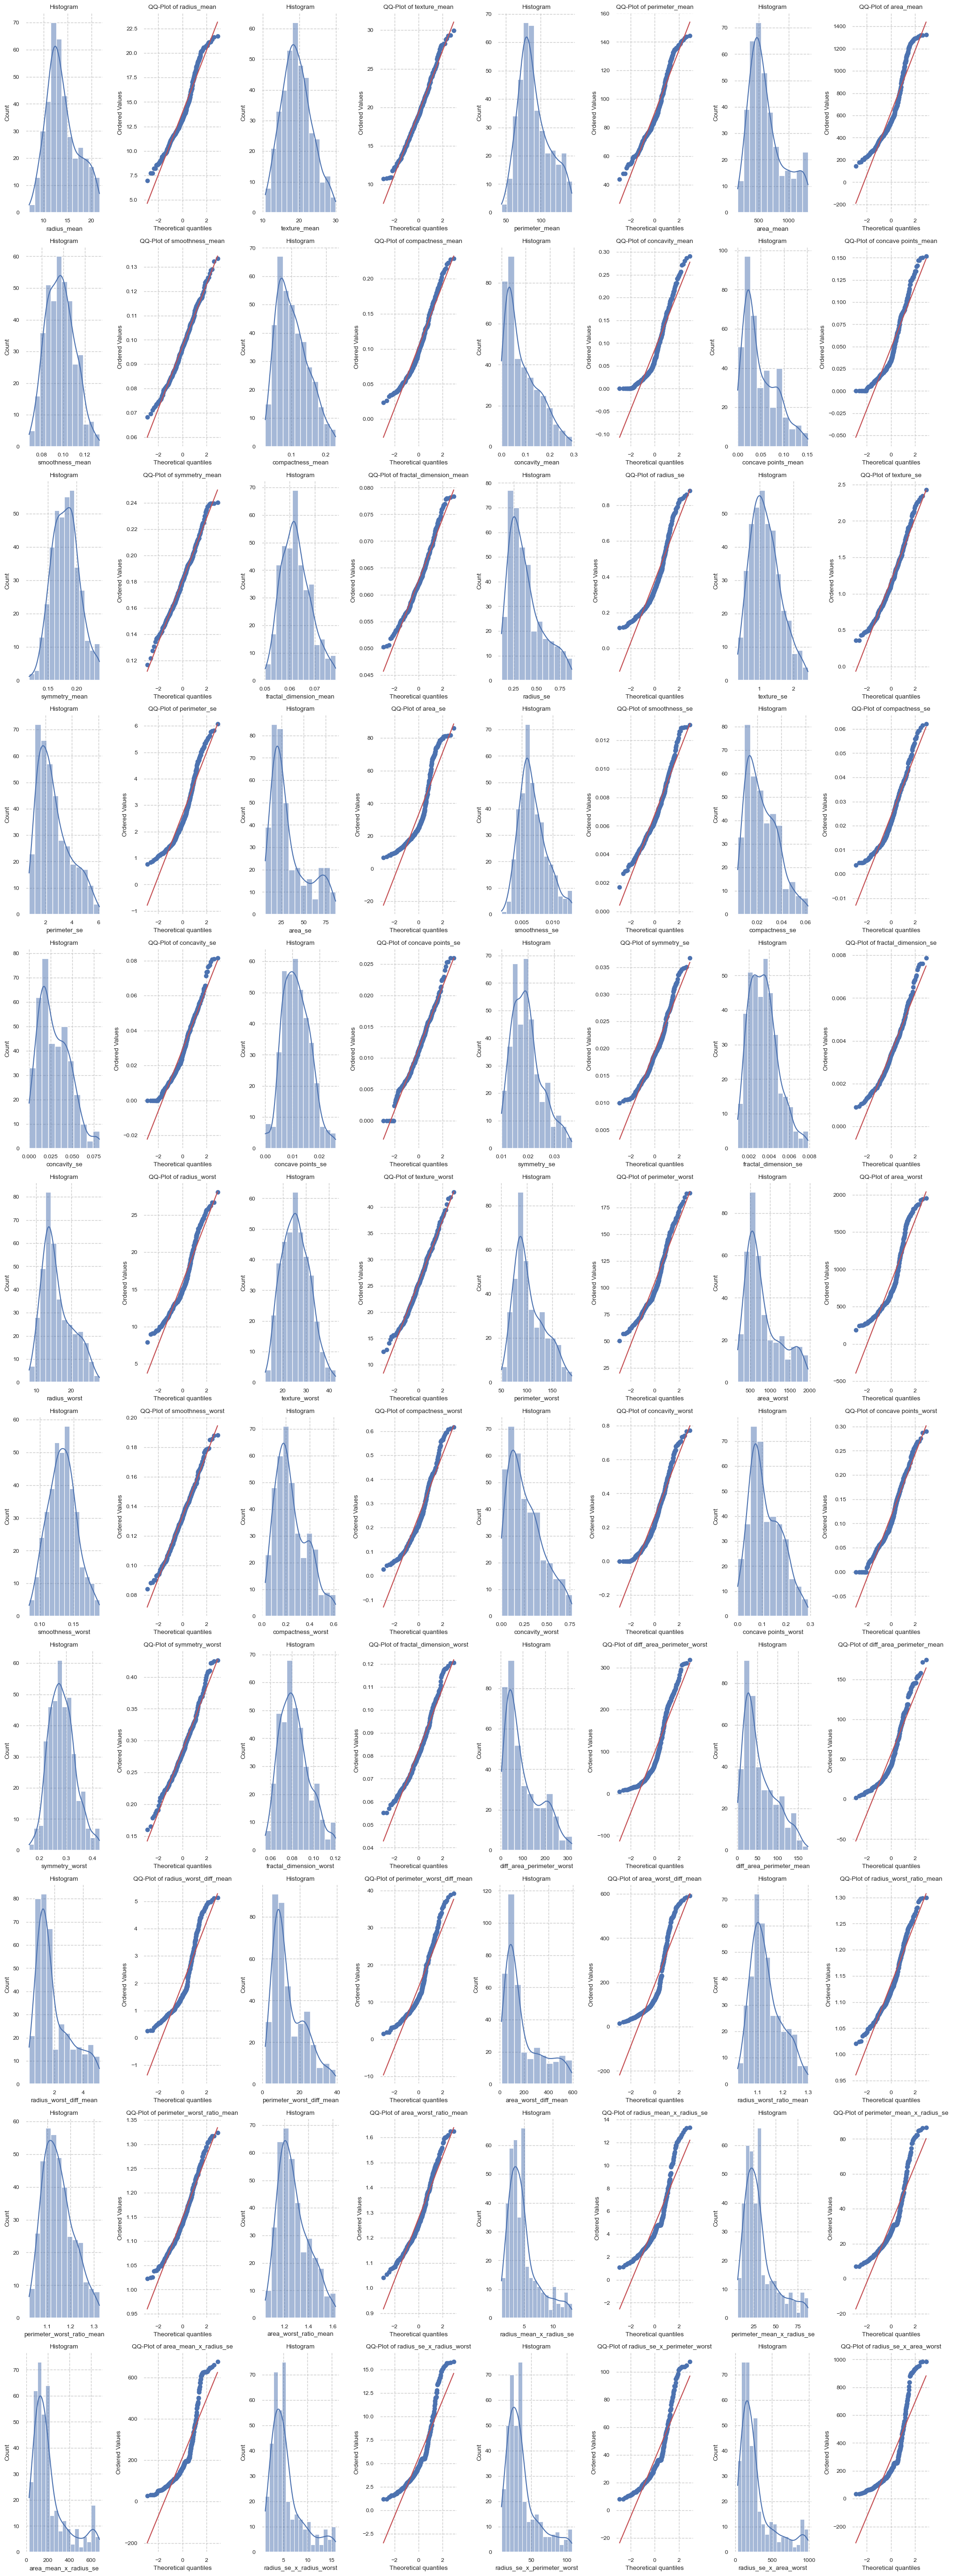

In [31]:
# identify non-normally distributed variables using histograms and qq plots
dp.evaluate_normality(X_train_di)

Observations
* About half of the features show a deviation from the normal distribution in the histogram and in the QQ plots, while the other half is approximately normally distributed.
* It is not always easy to decide whether a feature is normally distributed or not.
* Especially the `_se` features and the newly added features show a deviation from the normal distribution. 

In [32]:
# determine normally distributed features from the histograms and qq plots
normal_vars = ["radius_mean", "texture_mean", "perimeter_mean", "smoothness_mean", "compactness_mean",
               "symmetry_mean", "fractal_dimension_mean", "texture_se", "smoothness_se",
               "concave points_se", "fractal_dimension_se", "radius_worst", "texture_worst", "perimeter_worst",
               "smoothness_worst", "concave points_worst", "symmetry_worst",
               "fractal_dimension_worst", "radius_worst_ratio_mean", "perimeter_worst_ratio_mean",
               "area_worst_ratio_mean"]

# determine non-normally distributed features from the histograms and qq plots
non_normal_vars = ["area_mean", "concavity_mean", "concave points_mean", "radius_se", "perimeter_se",
                   "area_se", "compactness_se", "concavity_se", "symmetry_se", "area_worst", "compactness_worst", "concavity_worst",
                   "diff_area_perimeter_worst", "diff_area_perimeter_mean", "radius_worst_diff_mean",
                   "perimeter_worst_diff_mean", "area_worst_diff_mean", "radius_mean_x_radius_se",
                   "perimeter_mean_x_radius_se", "area_mean_x_radius_se", "radius_se_x_radius_worst",
                   "radius_se_x_perimeter_worst", "radius_se_x_area_worst"]

print(f"Number of non-normal features: {len(non_normal_vars)}")

# initiliaze the LogTransformer 
log_transformer = dp.LogTransformer(non_normal_vars=non_normal_vars, transform_all=False, constant_value=1)

# fit the LogTransformer on the training data
log_transformer.fit(X_train_di)

# use the LogTransformer to transform the training, validation and test data
X_train_log = log_transformer.transform(X_train_di, verbose=True)
X_val_log = log_transformer.transform(X_val_di)
X_test_log = log_transformer.transform(X_test_di)

Number of non-normal features: 23
[INFO] The following constants were added: 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[INFO] Performed log transformation of 23 features


Observations
* 23 features were identified as not normally distributed.
* All 23 features contained no negative values, so only +1 was added to each to ensure that all features were positive. 

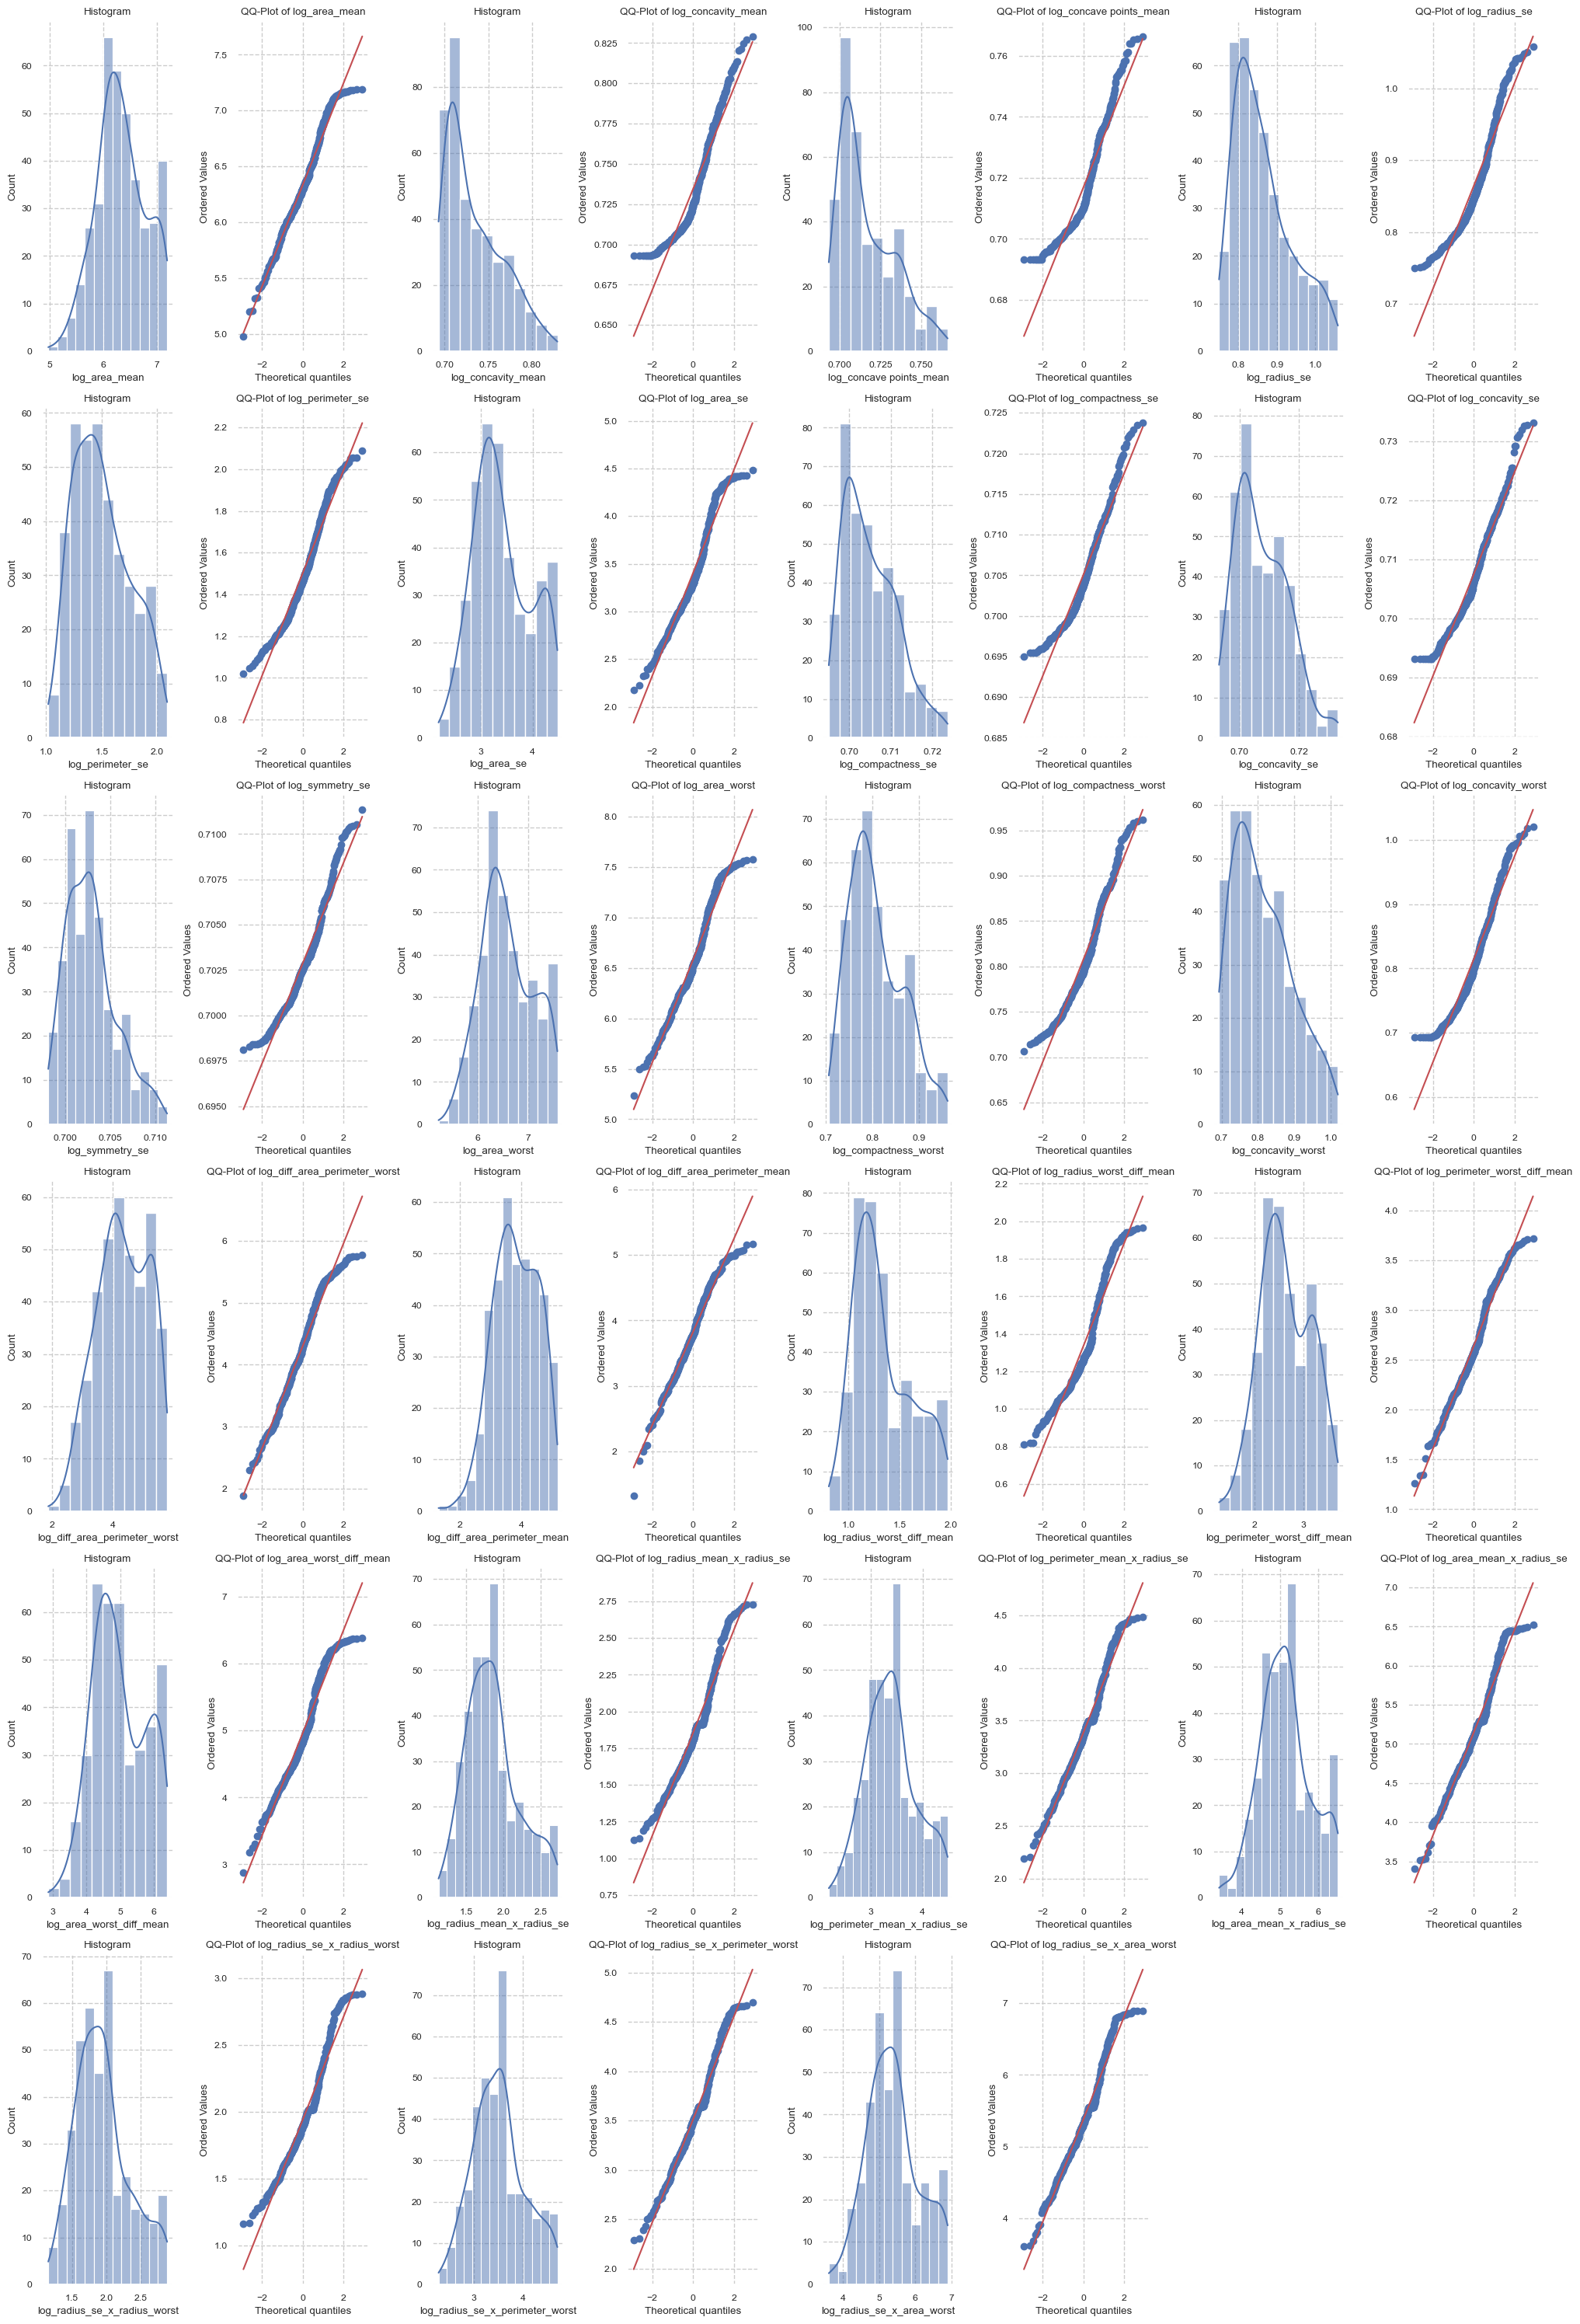

In [33]:
# evaluate the effect of the log transformation
log_names = [f"log_{var}" for var in non_normal_vars]
dp.evaluate_normality(X_train_log[log_names])

Observations
* The log transformation has caused the distribution to approach a normal distribution for some features (e.g. `radius_se`, `perimeter_se`, `radius_se_x_perimeter_worst`), but less so for others (e.g. `area_mean`, `concavity_mean`).

## 5 Scale the Data
### 5.1 Standardization

In [34]:
# perform standardization
standard_scaler = dp.Scaler(method="standard")
standard_scaler.fit(X_train_log)

X_train_z = standard_scaler.transform(X_train_log, verbose=True)
X_val_z = standard_scaler.transform(X_val_log)
X_val_z = standard_scaler.transform(X_test_log)

print("Train set:")
X_train_z.describe()

[INFO] Applied standard scaling to the data
Train set:


radius_mean  texture_mean  perimeter_mean  log_area_mean  \
count      386.000       386.000         386.000        386.000   
mean        -0.000         0.000          -0.000          0.000   
std          1.001         1.001           1.001          1.001   
min         -2.148        -2.129          -2.111         -2.969   
25%         -0.701        -0.722          -0.704         -0.662   
50%         -0.211        -0.093          -0.214         -0.083   
75%          0.598         0.630           0.612          0.714   
max          2.422         2.646           2.439          1.872   

       smoothness_mean  compactness_mean  log_concavity_mean  \
count          386.000           386.000             386.000   
mean            -0.000             0.000              -0.000   
std              1.001             1.001               1.001   
min             -2.261            -1.770              -1.267   
25%             -0.759            -0.801              -0.814   
50%             -0.021            -0.134              -0.296   
75%              0.722             0.627               0.694   
max              2.837             2.786               2.905   

       log_concave points_mean  symmetry_mean  fractal_dimension_mean  \
count                  386.000        386.000                 386.000   
mean                     0.000         -0.000                  -0.000   
std                      1.001          1.001                   1.001   
min                     -1.361         -2.715                  -2.119   
25%                     -0.770         -0.746                  -0.726   
50%                     -0.395         -0.001                  -0.109   
75%                      0.714          0.620                   0.645   
max                      2.846          2.512                   2.699   

       log_radius_se  texture_se  log_perimeter_se  log_area_se  \
count        386.000     386.000           386.000      386.000   
mean           0.000       0.000            -0.000       -0.000   
std            1.001       1.001             1.001        1.001   
min           -1.541      -1.905            -1.940       -2.248   
25%           -0.785      -0.759            -0.816       -0.732   
50%           -0.236      -0.118            -0.153       -0.196   
75%            0.583       0.643             0.722        0.792   
max            2.631       2.899             2.350        1.966   

       smoothness_se  log_compactness_se  log_concavity_se  concave points_se  \
count        386.000             386.000           386.000            386.000   
mean           0.000              -0.000            -0.000              0.000   
std            1.001               1.001             1.001              1.001   
min           -2.300              -1.572            -1.640             -2.316   
25%           -0.679              -0.824            -0.779             -0.780   
50%           -0.192              -0.191            -0.160             -0.074   
75%            0.576               0.705             0.751              0.716   
max            2.840               2.931             2.938              2.921   

       log_symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
count          386.000               386.000       386.000        386.000   
mean            -0.000                 0.000        -0.000         -0.000   
std              1.001                 1.001         1.001          1.001   
min             -1.698                -1.821        -1.867         -2.226   
25%             -0.803                -0.775        -0.688         -0.732   
50%             -0.110                -0.078        -0.240         -0.034   
75%              0.526                 0.555         0.669          0.759   
max              3.002                 3.152         2.839          2.898   

       perimeter_worst  log_area_worst  smoothness_worst  \
count          386.000         386.000           386.000   
mean             0.0

Observations
* The standardization of the features was successful: The mean value of the features is now 0 and the standard deviation is 1. 

### 5.2 Min-Max Scaling

In [35]:
# perform min-max scaling
minmax_scaler = dp.Scaler(method="min_max")
minmax_scaler.fit(X_train_log)

X_train_mm = minmax_scaler.transform(X_train_log, verbose=True)
X_val_mm = minmax_scaler.transform(X_val_log)
X_val_mm = minmax_scaler.transform(X_test_log)

print("Train set:")
X_train_mm.describe()

[INFO] Applied min_max scaling to the data
Train set:


radius_mean  texture_mean  perimeter_mean  log_area_mean  \
count      386.000       386.000         386.000        386.000   
mean         0.470         0.446           0.464          0.613   
std          0.219         0.210           0.220          0.207   
min          0.000         0.000           0.000          0.000   
25%          0.317         0.295           0.309          0.477   
50%          0.424         0.426           0.417          0.596   
75%          0.601         0.578           0.598          0.761   
max          1.000         1.000           1.000          1.000   

       smoothness_mean  compactness_mean  log_concavity_mean  \
count          386.000           386.000             386.000   
mean             0.443             0.389               0.304   
std              0.196             0.220               0.240   
min              0.000             0.000               0.000   
25%              0.295             0.213               0.109   
50%              0.439             0.359               0.233   
75%              0.585             0.526               0.470   
max              1.000             1.000               1.000   

       log_concave points_mean  symmetry_mean  fractal_dimension_mean  \
count                  386.000        386.000                 386.000   
mean                     0.323          0.519                   0.440   
std                      0.238          0.192                   0.208   
min                      0.000          0.000                   0.000   
25%                      0.140          0.377                   0.289   
50%                      0.230          0.519                   0.417   
75%                      0.493          0.638                   0.574   
max                      1.000          1.000                   1.000   

       log_radius_se  texture_se  log_perimeter_se  log_area_se  \
count        386.000     386.000           386.000      386.000   
mean           0.369       0.397             0.452        0.533   
std            0.240       0.208             0.233        0.238   
min            0.000       0.000             0.000        0.000   
25%            0.181       0.239             0.262        0.360   
50%            0.313       0.372             0.417        0.487   
75%            0.509       0.530             0.621        0.721   
max            1.000       1.000             1.000        1.000   

       smoothness_se  log_compactness_se  log_concavity_se  concave points_se  \
count        386.000             386.000           386.000            386.000   
mean           0.447               0.349             0.358              0.442   
std            0.195               0.222             0.219              0.191   
min            0.000               0.000             0.000              0.000   
25%            0.315               0.166             0.188              0.293   
50%            0.410               0.307             0.323              0.428   
75%            0.559               0.506             0.522              0.579   
max            1.000               1.000             1.000              1.000   

       log_symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
count          386.000               386.000       386.000        386.000   
mean             0.361                 0.366         0.397          0.434   
std              0.213                 0.201         0.213          0.195   
min              0.000                 0.000         0.000          0.000   
25%              0.190                 0.210         0.251          0.292   
50%              0.338                 0.350         0.346          0.428   
75%              0.473                 0.478         0.539          0.583   
max              1.000                 1.000         1.000          1.000   

       perimeter_worst  log_area_worst  smoothness_worst  \
count          386.000         386.000           386.000   
mean             0.3

Observations
* The min-max scaling was successful, as the minimum is now 0 and the maximum 1 for each feature. 

## 6 Select the Data

In [36]:
# perform correlation based feature selection (CFS)
csf_selector = dp.FeatureSelector()
csf_selector.fit(X_train_z, y_train)
X_train_selected = csf_selector.transform(X_train_z)
print(f"number of features in the dataset: {X_train_z.shape[1]}")
print(f"selected features: {X_train_selected.columns}")
print(f"number of selected features: {len(X_train_selected.columns.tolist())}")

number of features in the dataset: 44
selected features: Index(['perimeter_worst', 'concave points_worst', 'log_radius_worst_diff_mean',
       'log_concave points_mean', 'log_radius_se_x_area_worst',
       'log_concavity_mean', 'area_worst_ratio_mean', 'radius_mean',
       'texture_mean', 'smoothness_worst', 'log_area_worst'],
      dtype='object')
number of selected features: 11


Observations
* 11 features, i.e. a quarter of the features in total, were identified as relevant using the CFS method.
* 8 of the original features contained in the dataset and three of the added features were selected. 
* Approximately half of the selected features were log-transformed. 

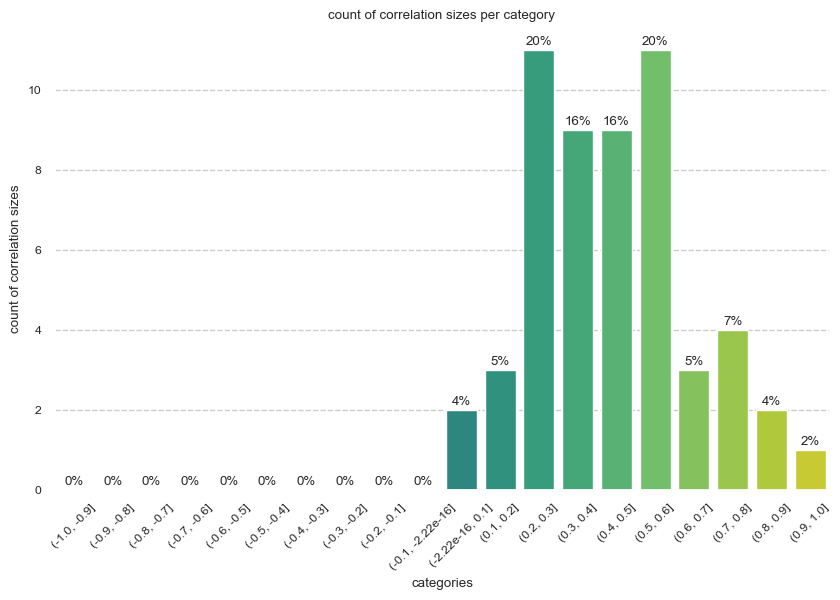

In [37]:
# calculate the correlation between the selected features
corr_matrix = X_train_selected.corr(method="kendall") 

# visualize correlation sizes
dp.visualize_correlation_sizes(corr_matrix, absolute_values=False)

Observations
* The majority (61%) of the correlations between the features are rather low (< 0.5). This indicates that the features tend to measure different concepts and that the CFS method worked.    

In [38]:
# check whether the list of selected features is different, if the data were not log transformed

# perform standardization
standard_scaler = dp.Scaler(method="standard")
standard_scaler.fit(X_train_di)
X_train_z_no_log = standard_scaler.transform(X_train_di, verbose=True)

# perform CFS 
csf_selector = dp.FeatureSelector()
csf_selector.fit(X_train_z_no_log, y_train)
X_train_selected_no_log = csf_selector.transform(X_train_z_no_log)
print(f"number of features in the dataset: {X_train_selected_no_log.shape[1]}")
print(f"selected features: {X_train_selected_no_log.columns}")
print(f"number of selected features: {len(X_train_selected_no_log.columns.tolist())}")

[INFO] Applied standard scaling to the data
number of features in the dataset: 14
selected features: Index(['perimeter_worst', 'concave points_worst', 'area_worst_diff_mean',
       'concavity_mean', 'radius_se_x_area_worst', 'area_worst_ratio_mean',
       'diff_area_perimeter_mean', 'texture_mean', 'radius_worst',
       'concave points_mean', 'smoothness_worst', 'area_mean',
       'radius_worst_diff_mean', 'diff_area_perimeter_worst'],
      dtype='object')
number of selected features: 14


Observations
* A different number of features is selected if the variables are not log-transformed beforehand.
* This means that which features are selected varies depending on the previously used data preprocessing strategies.
* Nevertheless, there is an overlap of the selected features for the two different data preprocessing strategies. 

## 7 Balance the Data

Category count after SMOTE:  0    242
1    242
Name: diagnosis, dtype: int64


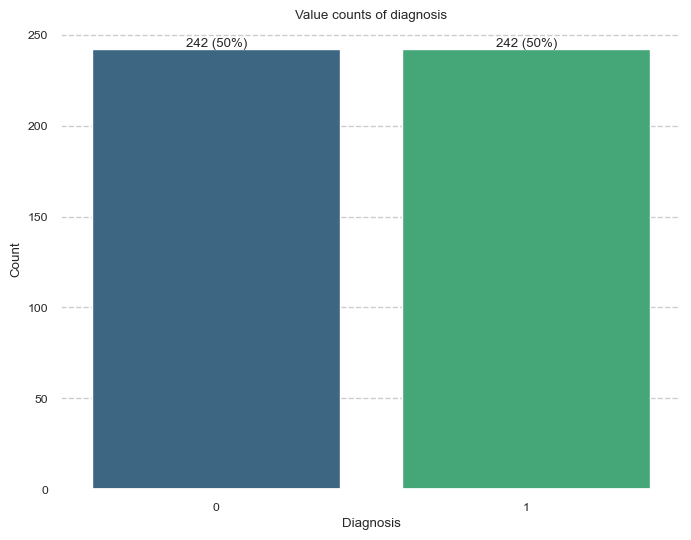

In [39]:
# balance the dataset using the synthetic minority over-sampling technique (SMOTE)
sm = SMOTE(random_state=42)
X_selected_res, y_res = sm.fit_resample(X_train_selected, y_train)
print("Category count after SMOTE: ", y_res.value_counts())

dp.display_value_counts(y_res)

Observations
* After balancing the data, there are the same number of data records in both tumor groups. 

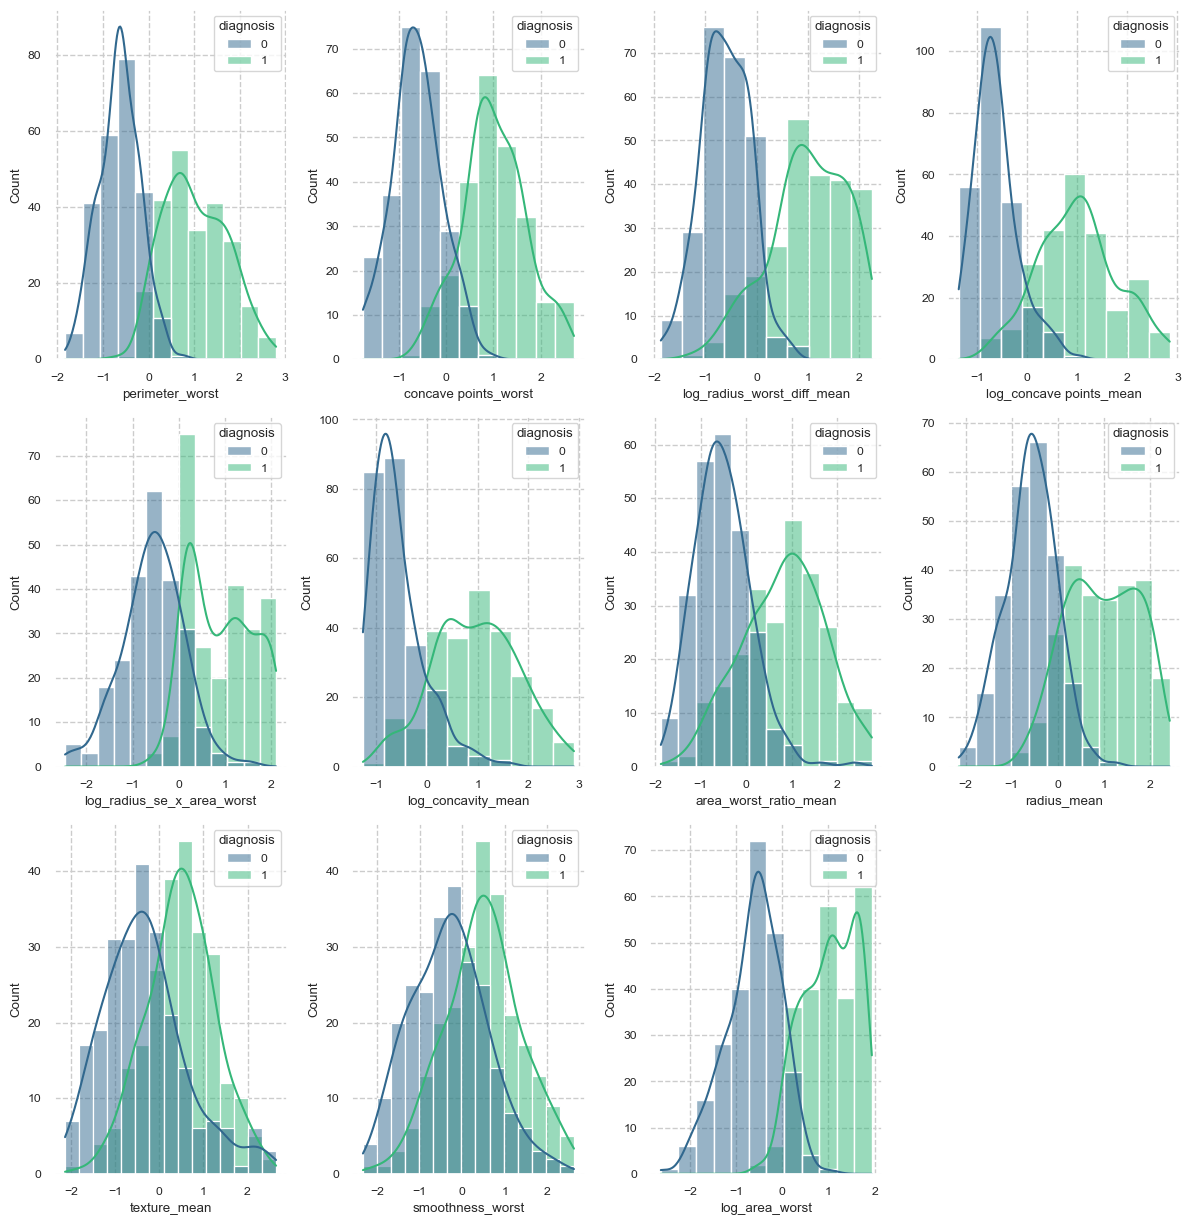

In [40]:
# look at the data distribution from the resampled data
df_train_res = dp.add_label(X_selected_res, y_res)
dp.generate_histograms(df_train_res, hue="diagnosis")

Observations
* It is clearly visible that after balancing the dataset, there are significantly more data records for the group of malignant tumors. 

## III. References
Galli, S. (2022). _Python feature engineering cookbook: Over 70 recipes for creating, engineering, and transforming features to build machine learning models_ (2nd ed.). Packt Publishing. 